In [45]:
import numpy as np
import pandas as pd
import scipy
from numpy import linalg
import cvxopt
from cvxopt import solvers, matrix
from scipy.spatial.distance import pdist, cdist, squareform

import matplotlib.pyplot as plt
%inline matplotlib
from PIL import Image


ERROR:root:Line magic function `%inline` not found.


In [3]:
%%time
df_X_train = pd.read_csv('Xtr.csv', header=None, usecols=np.arange(3072))
df_X_test = pd.read_csv('Xte.csv', header=None, usecols=np.arange(3072))
df_y_train = pd.read_csv('Ytr.csv')


X_train = np.array(df_X_train, dtype=float)
X_test = np.array(df_X_test, dtype=float)
y_train = np.array(df_y_train['Prediction'], dtype=float)

CPU times: user 4.88 s, sys: 372 ms, total: 5.25 s
Wall time: 5.71 s


In [8]:
# Data Visualization : The Data set train is balance, OVA can be implemented
classes = np.unique(y_train)
for class_ in classes:
    print(class_, np.mean(class_ == y_train))

0.0 0.1
1.0 0.1
2.0 0.1
3.0 0.1
4.0 0.1
5.0 0.1
6.0 0.1
7.0 0.1
8.0 0.1
9.0 0.1


In [30]:
import matplotlib.pyplot as plt
from PIL import Image

"""fname = 'image.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)"""
plt.imshow(x, cmap='gray')
plt.show()

TypeError: Invalid dimensions for image data

In [49]:
def rgb2gray(rgb, reshape = True):
    r = rgb[:1024].reshape(-1,1)
    g = rgb[1024:2048].reshape(-1,1)
    b = rgb[2048:].reshape(-1,1)
    print(r.shape, b.shape, g.shape)
    colors = np.c_[r, g, b]
    print(colors.shape)
    gray = np.dot(colors, [0.299, 0.587, 0.114])
    print(gray.shape)
    if reshape is True:
        gray = gray.reshape(32,32)
    return gray
    #return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


In [ ]:
def reshape32pix(x):
    res = np.zeros((32,32))
    for k in np.ran

In [82]:
def plot_gray(X):
    n, p = X.shape
    for kk in range(n):
        x = X[kk]
        im = rgb2gray(x)
        plt.imshow(im, cmap='gray')
        plt.show()

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


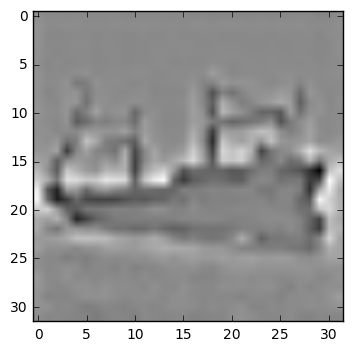

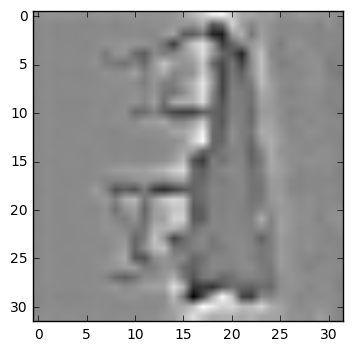

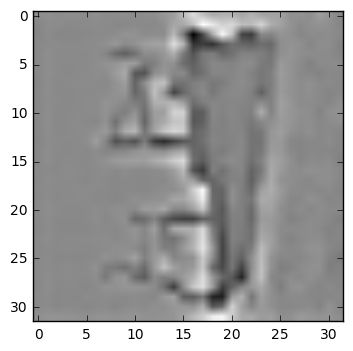

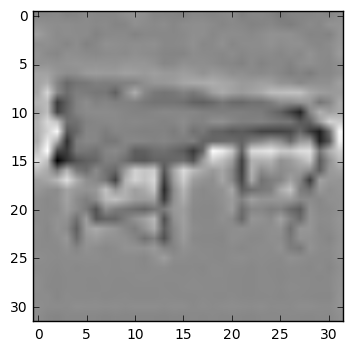

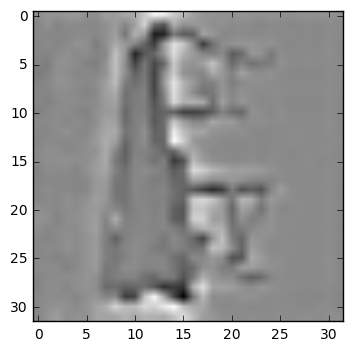

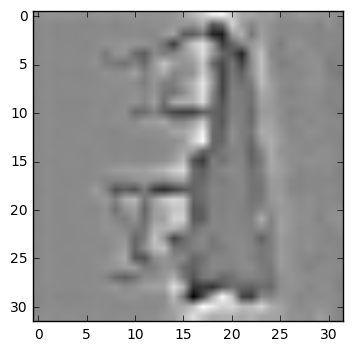

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


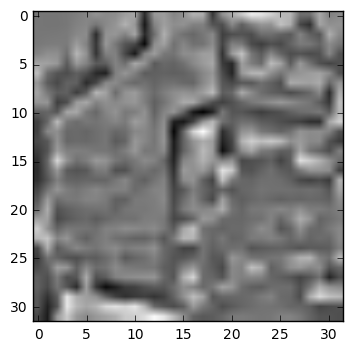

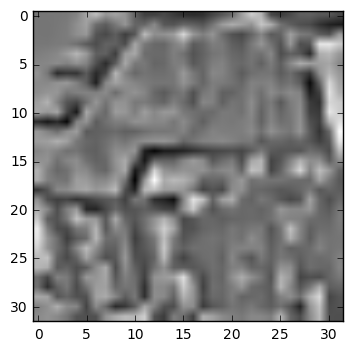

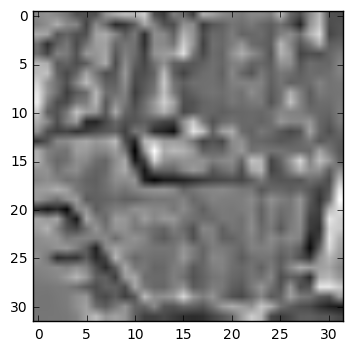

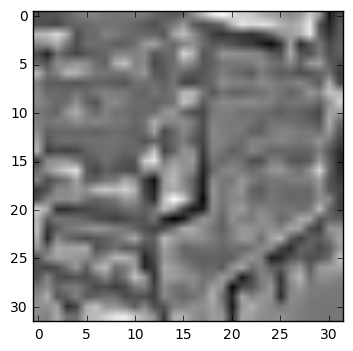

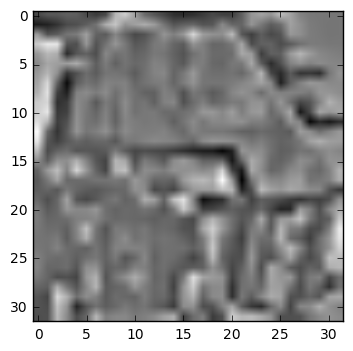

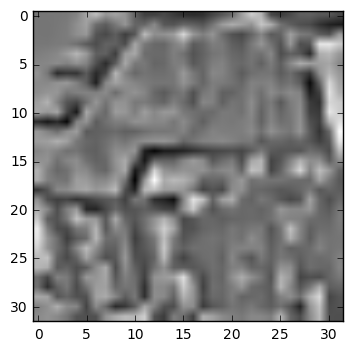

In [61]:

for kk in range(2):
    x = X_train[kk]
    im = rgb2gray(x)
    plt.imshow(im, cmap='gray')
    plt.show()
    im2 = im.transpose()
    im3 = np.rot90(im)
    plt.imshow(im2, cmap='gray')
    plt.show()
    im4 = np.rot90(im3)
    im5 = np.rot90(im4)
    im6 = np.rot90(im5)
    plt.imshow(im3, cmap='gray')
    plt.show()
    plt.imshow(im4, cmap='gray')
    plt.show()
    plt.imshow(im5, cmap='gray')
    plt.show()
    plt.imshow(im6.transpose(), cmap='gray')
    plt.show()

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)
(32, 32)


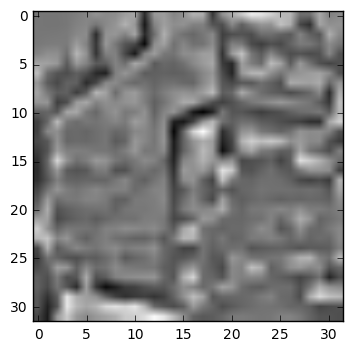

In [48]:
x = X_train[1]
im = rgb2gray(x)
im = im.reshape(32,32)
print(im.shape)
plt.imshow(im, cmap='gray')
plt.show()

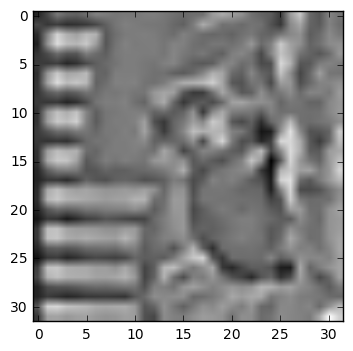

In [58]:
plt.imshow(im2, cmap='gray')
plt.show()

### Data augmentation

* We perform 4 rot90 and transpose every time so it will lead to 20K images

In [81]:
def rotation(X, y):
    
    n, p = X.shape
    X_r = X[:,:1024]
    X_g = X[:,1024:2048]
    X_b = X[:,2048:]
    X_res = np.zeros((8*n,p))
    y_res = np.zeros(8*n)
    for kk in range(3):
        x_r = X_r[kk].reshape(32,32)
        x_g = X_b[kk].reshape(32,32)
        x_b = X_g[kk].reshape(32,32)
        for rot in range(4):
            x_rrot = np.rot90(x_r)
            x_grot = np.rot90(x_g)
            x_brot = np.rot90(x_b)
            
            X_res[kk + rot] = np.r_[x_rrot.ravel(), x_grot.ravel(), x_brot.ravel()]
            y_res[kk+rot] = y[kk]
            # transpose
            X_res[kk +2*rot] = np.r_[np.transpose(x_rrot).ravel(), np.transpose(x_grot).ravel(), np.transpose(x_brot).ravel()]
            y_res[kk+rot*2] = y[kk]
    return X_res, y_res

In [80]:
X_res, y_res = rotation(X_train, y_train)

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


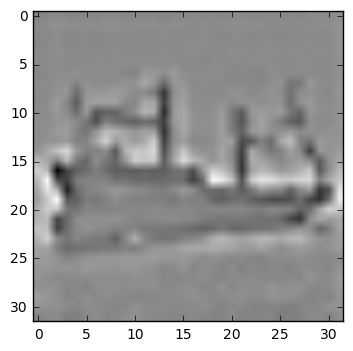

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


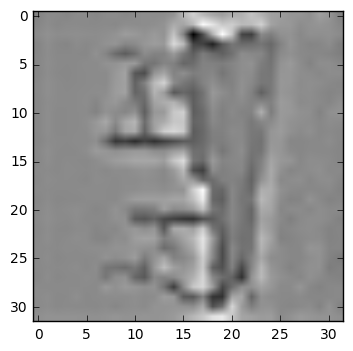

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


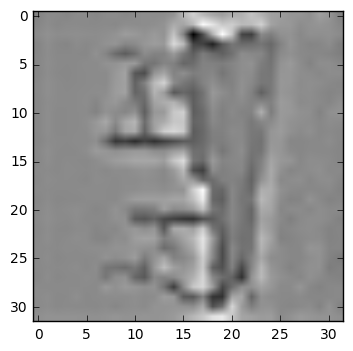

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


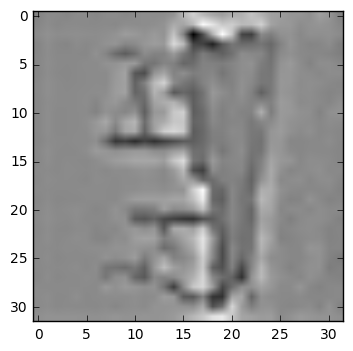

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


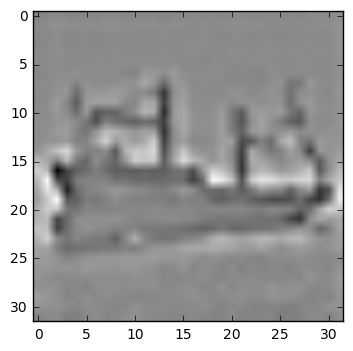

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


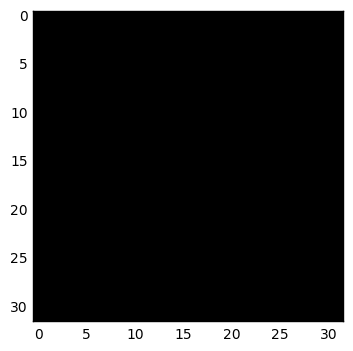

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


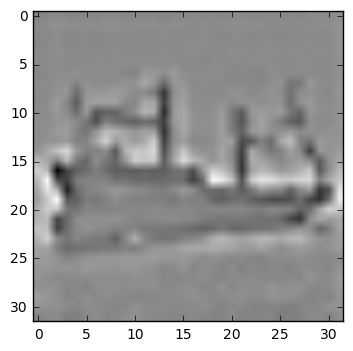

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


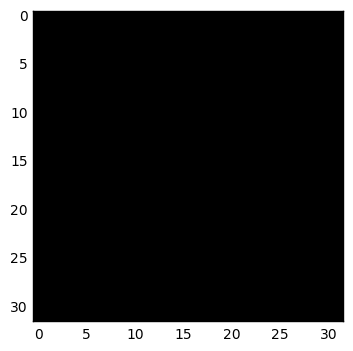

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


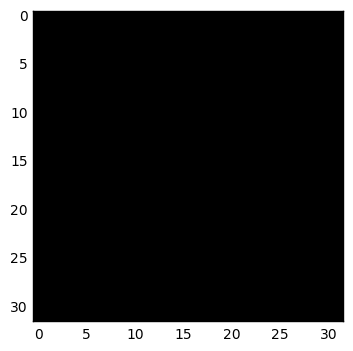

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


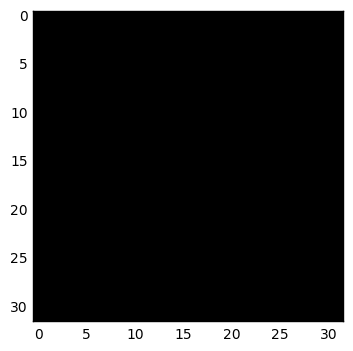

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


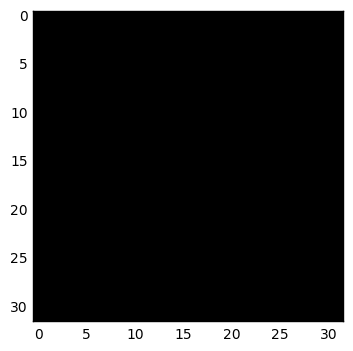

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


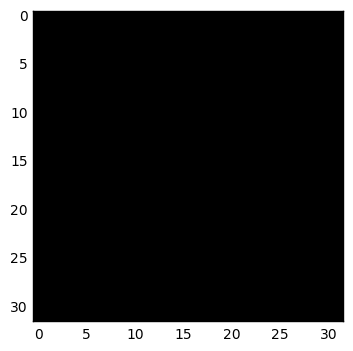

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


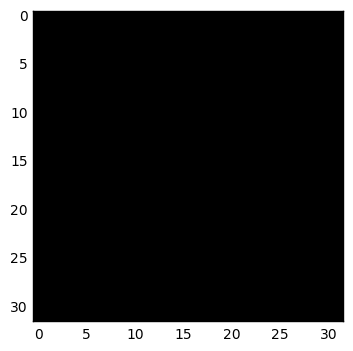

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


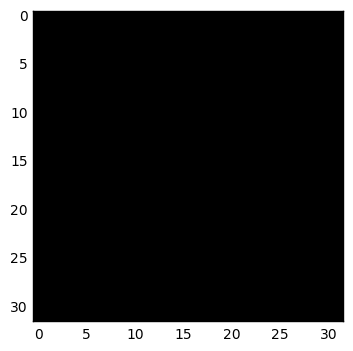

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


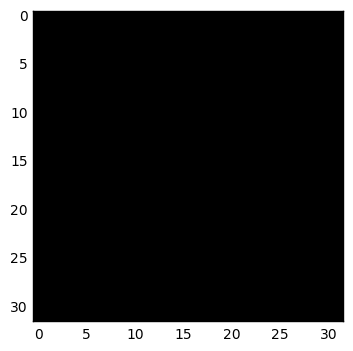

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


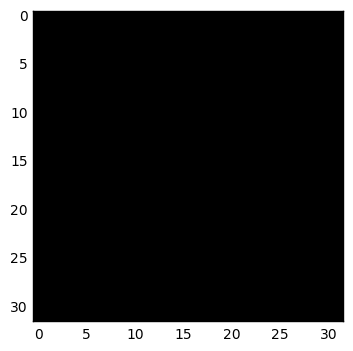

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


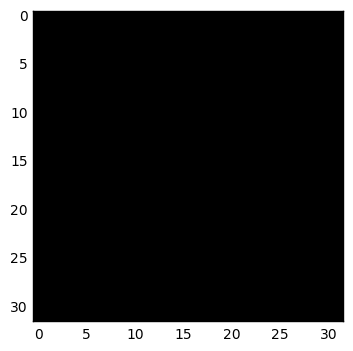

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


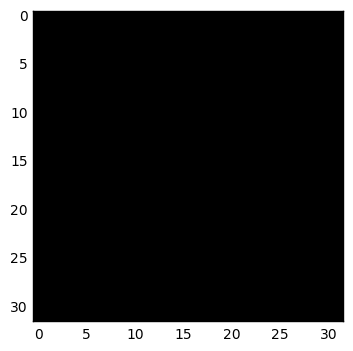

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


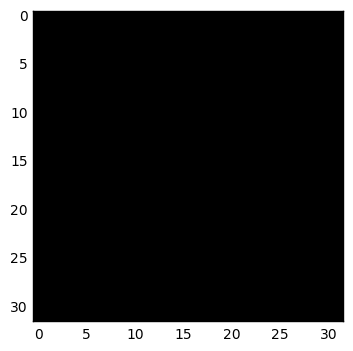

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


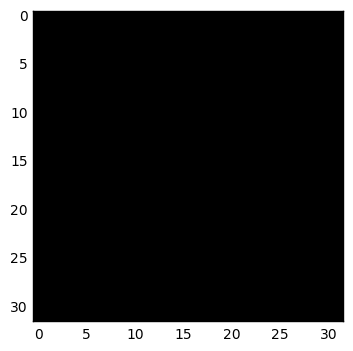

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


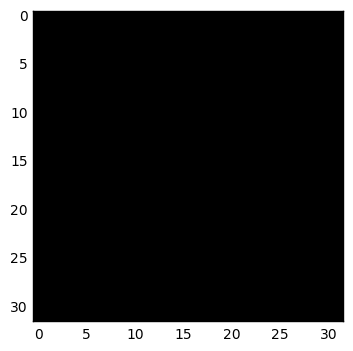

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


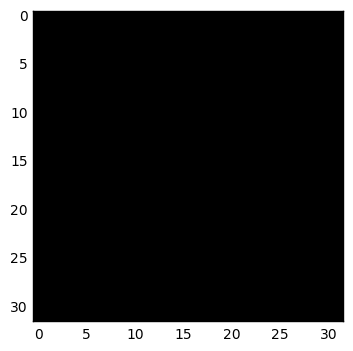

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


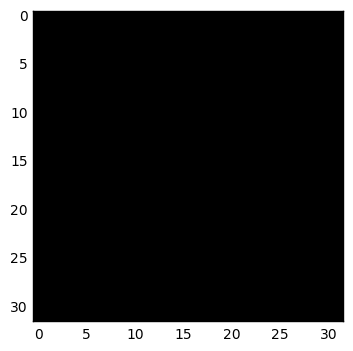

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


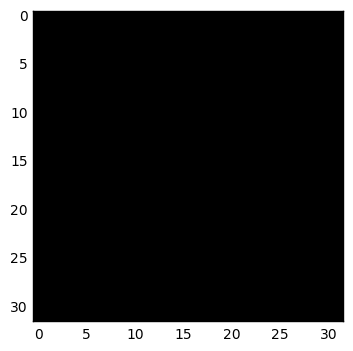

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


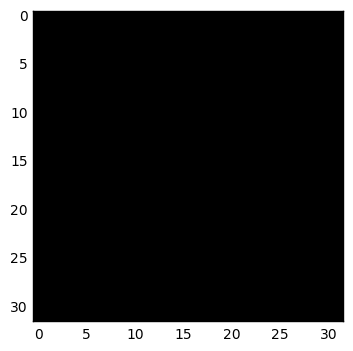

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


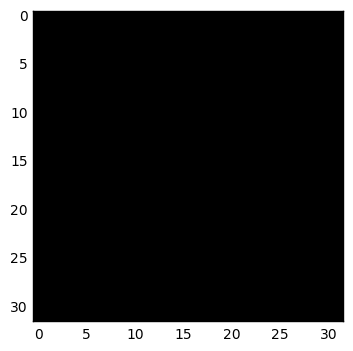

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


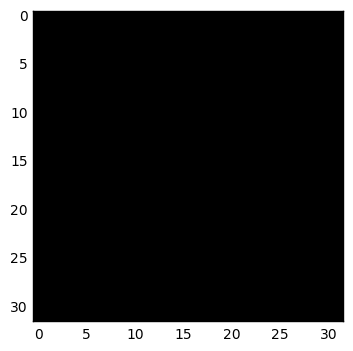

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


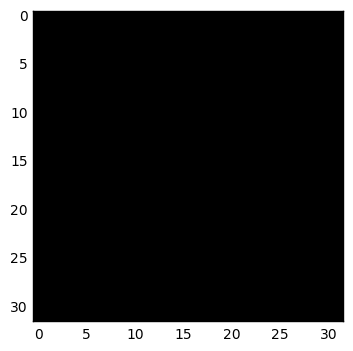

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


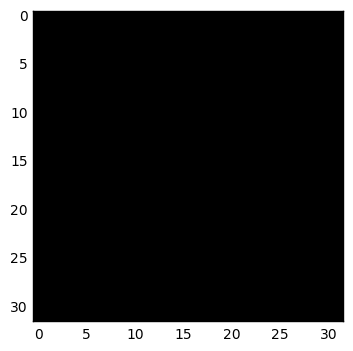

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


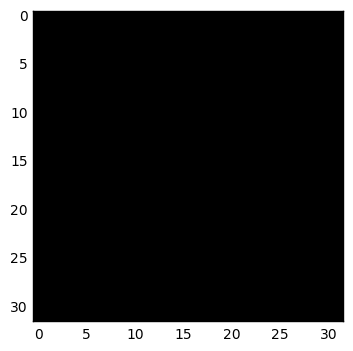

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


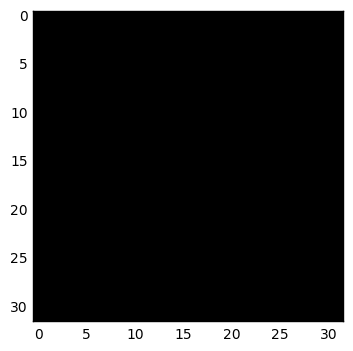

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


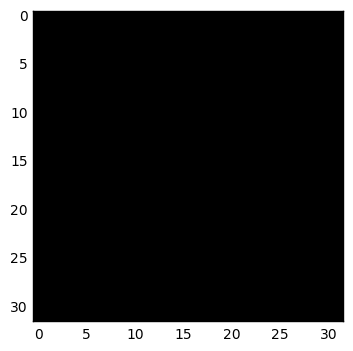

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


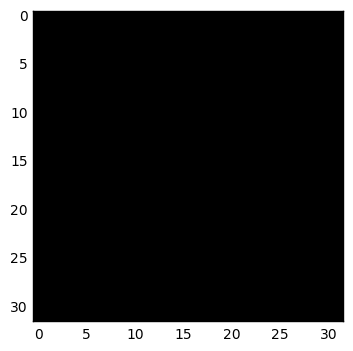

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


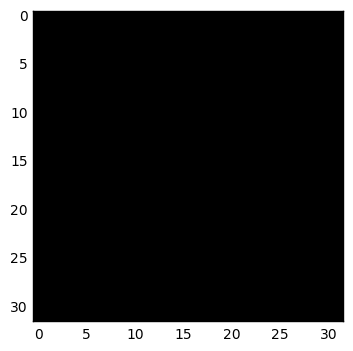

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


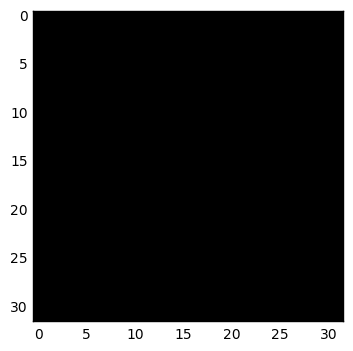

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


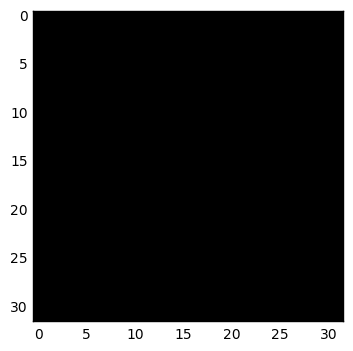

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


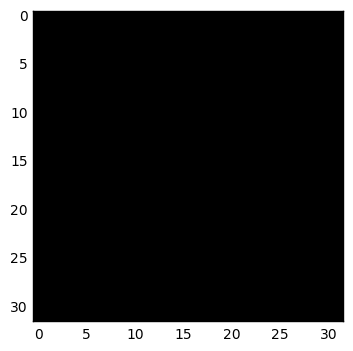

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


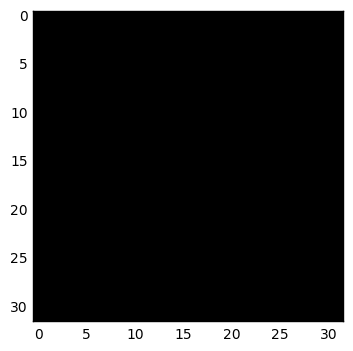

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


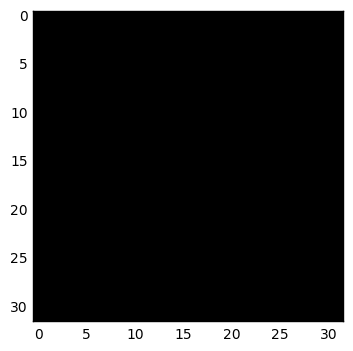

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


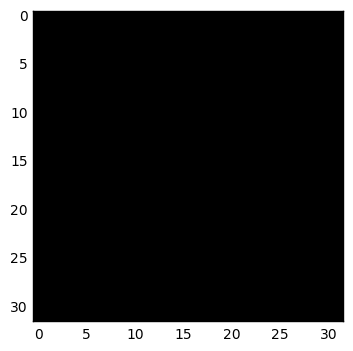

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


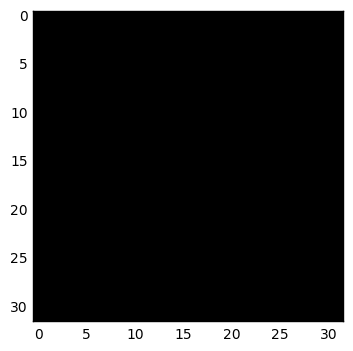

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


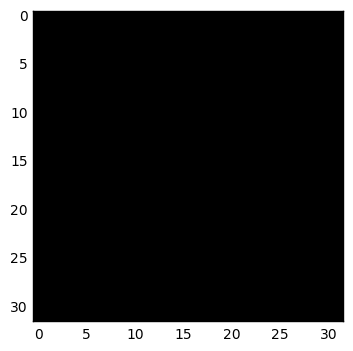

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


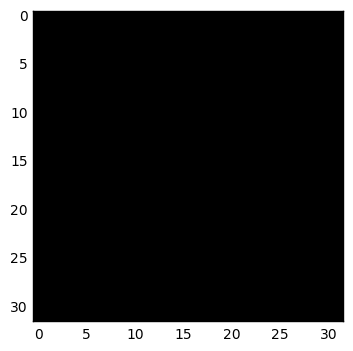

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


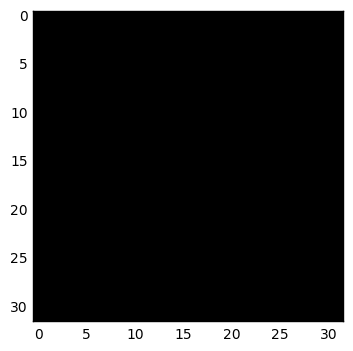

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


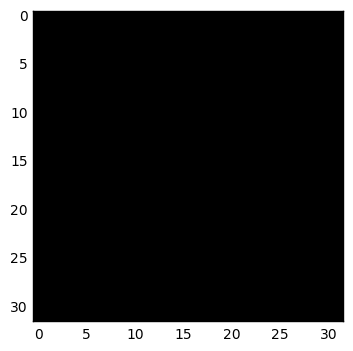

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


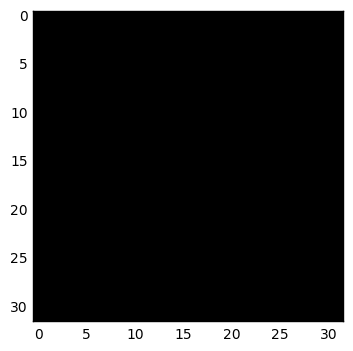

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


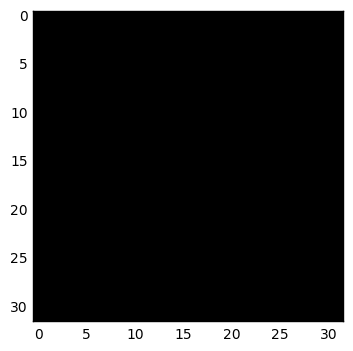

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


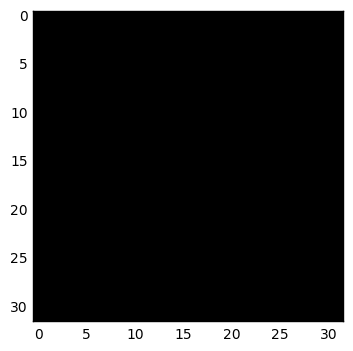

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


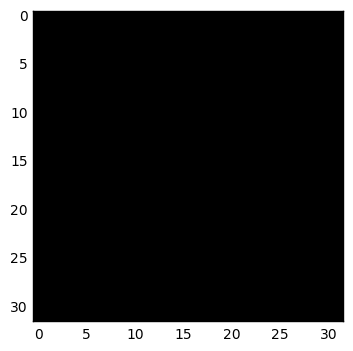

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


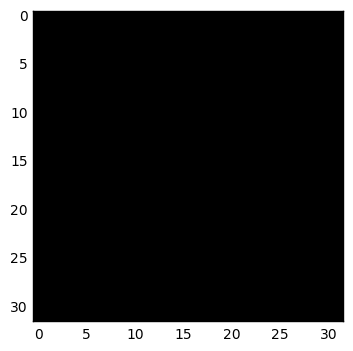

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


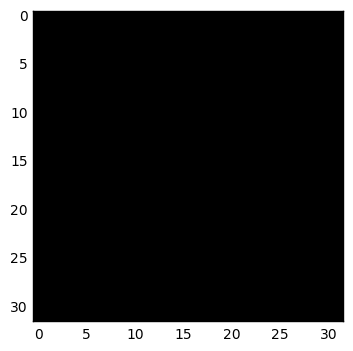

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


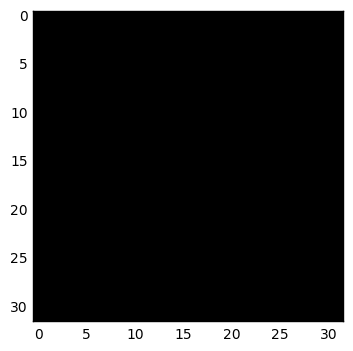

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


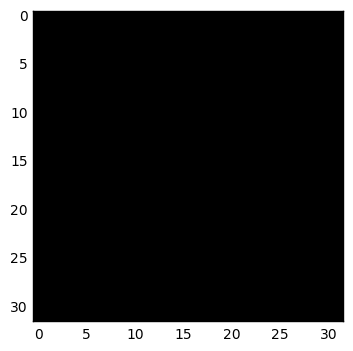

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


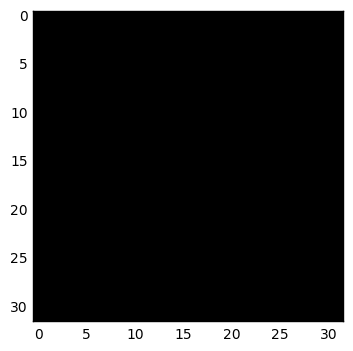

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


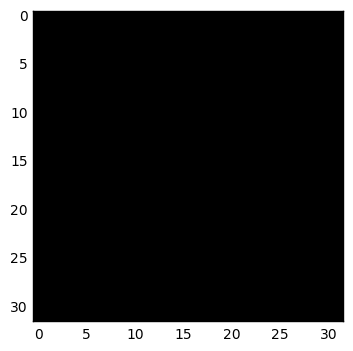

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


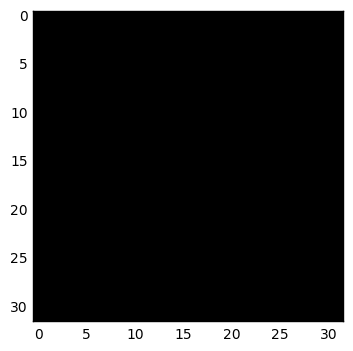

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


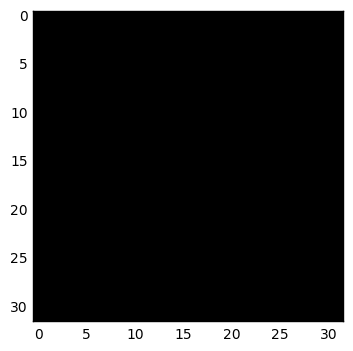

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


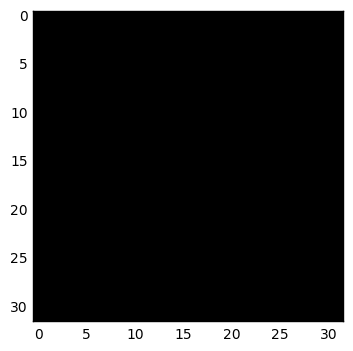

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


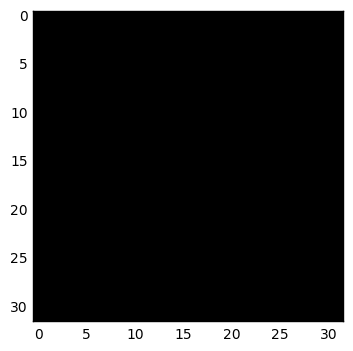

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


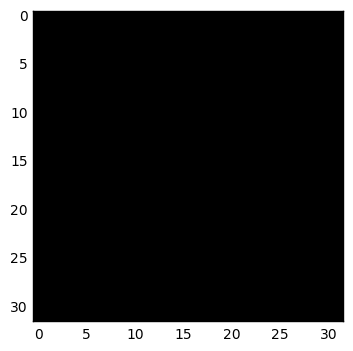

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


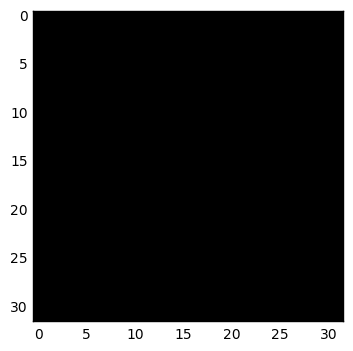

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


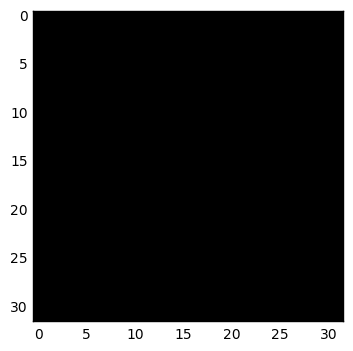

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


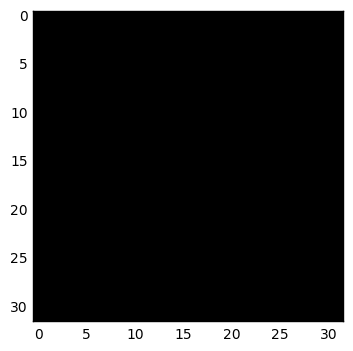

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


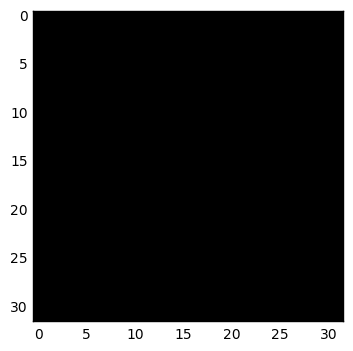

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


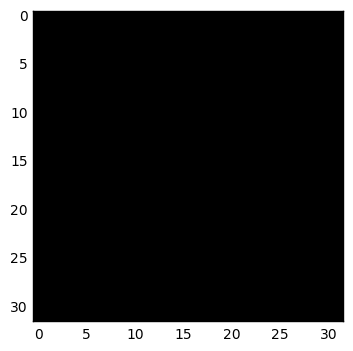

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


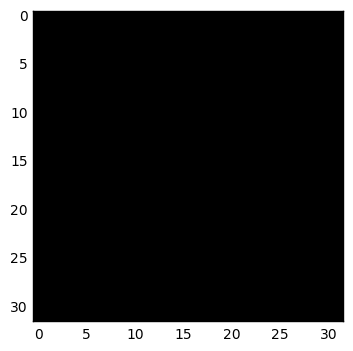

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


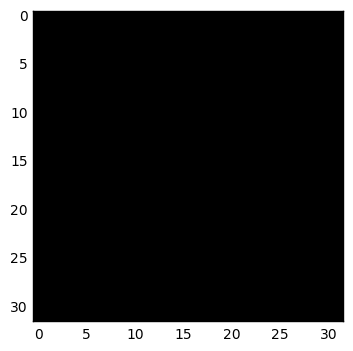

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


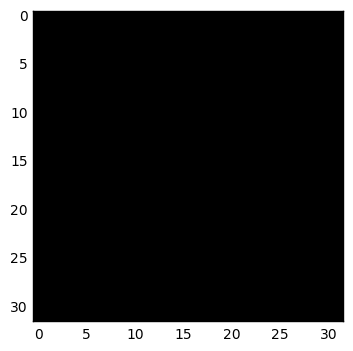

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


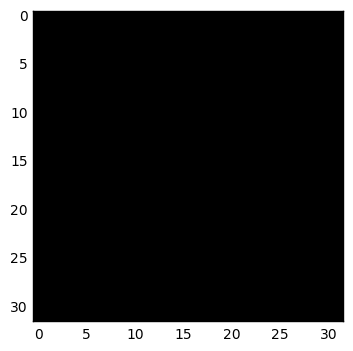

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


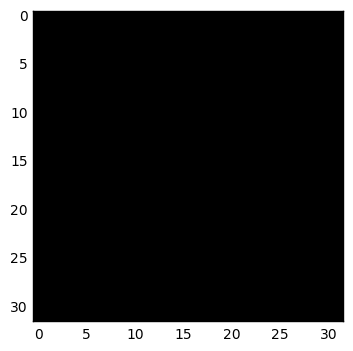

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


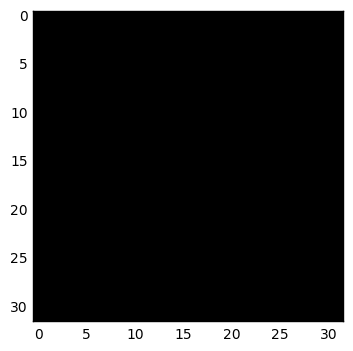

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


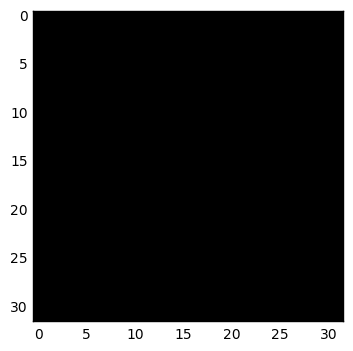

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


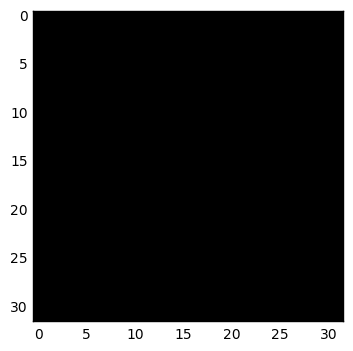

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


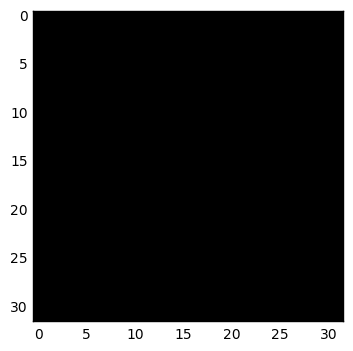

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


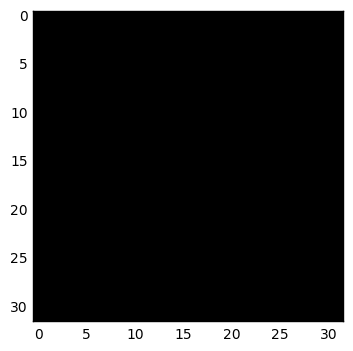

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


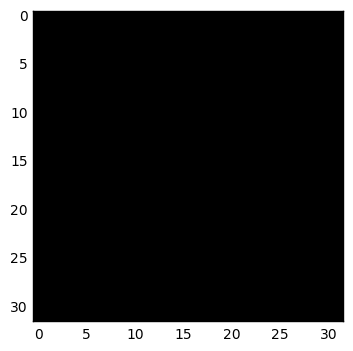

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


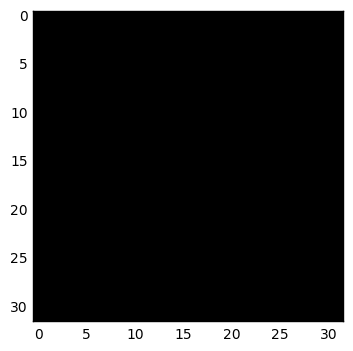

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


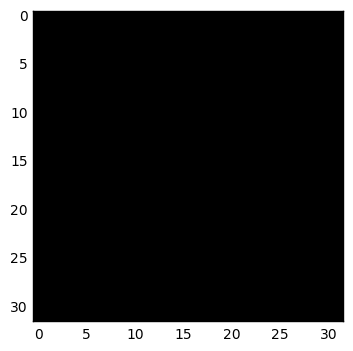

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


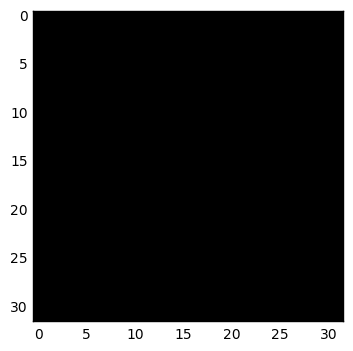

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


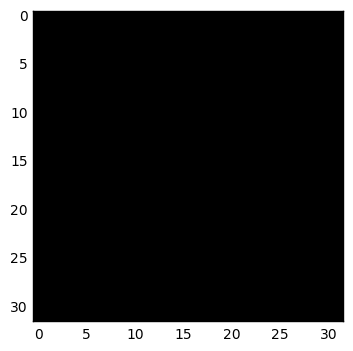

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


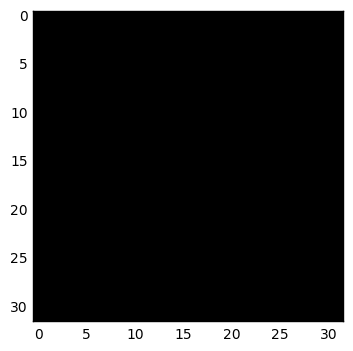

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


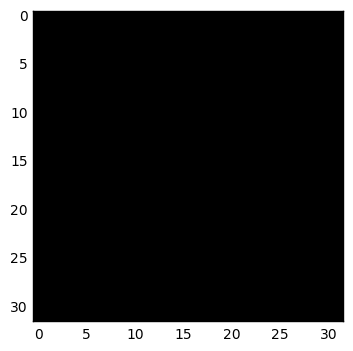

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


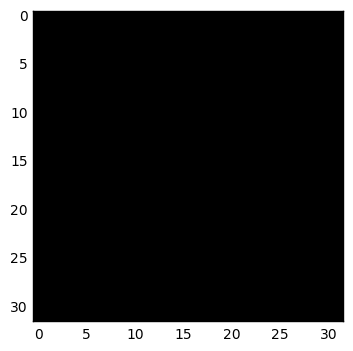

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


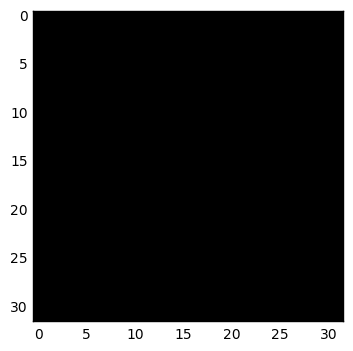

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


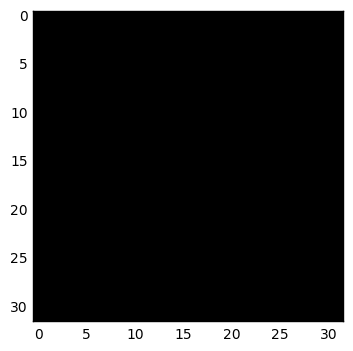

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


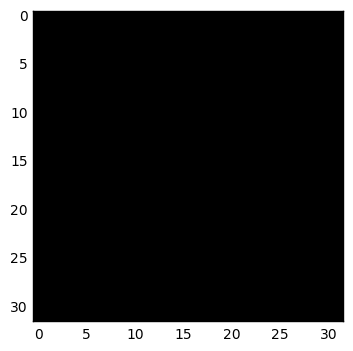

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


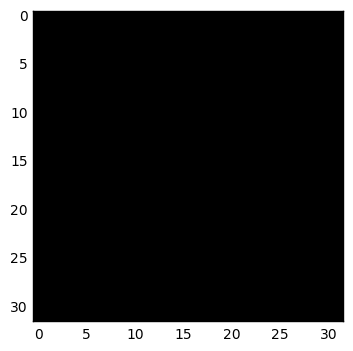

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


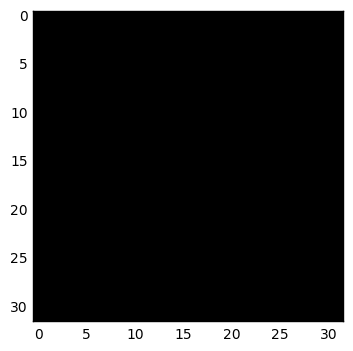

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


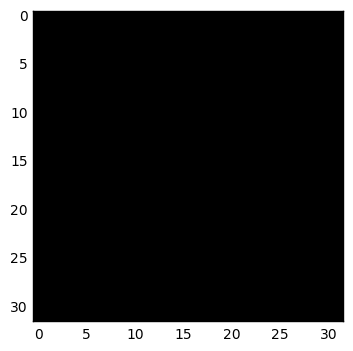

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


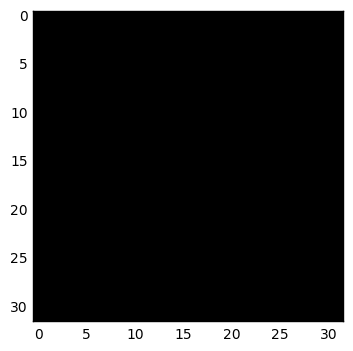

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


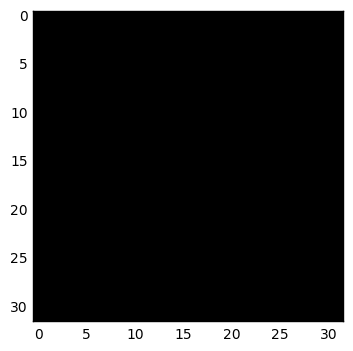

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


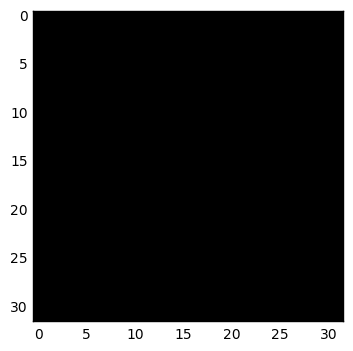

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


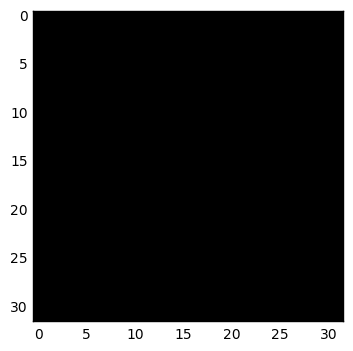

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


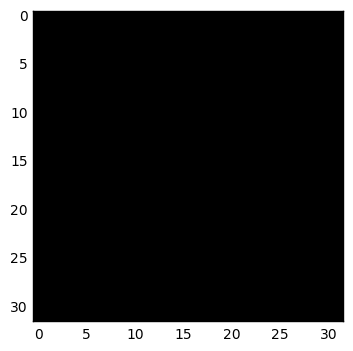

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


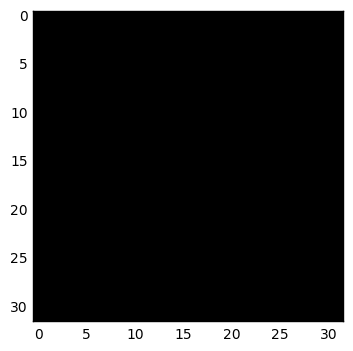

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


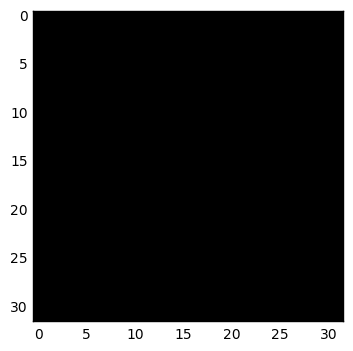

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


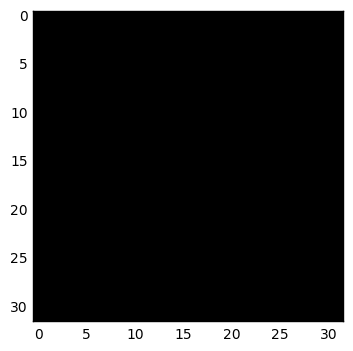

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


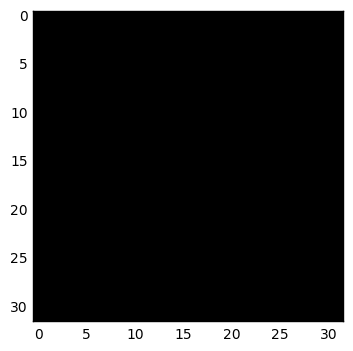

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


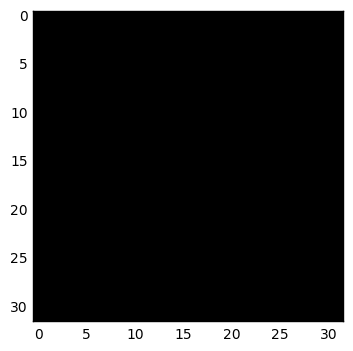

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


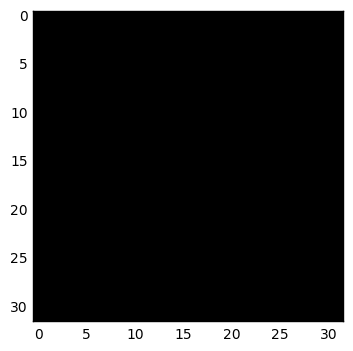

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


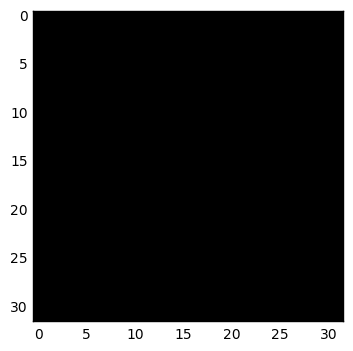

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


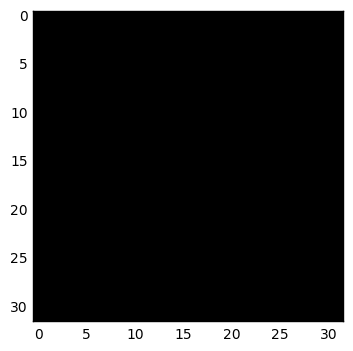

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


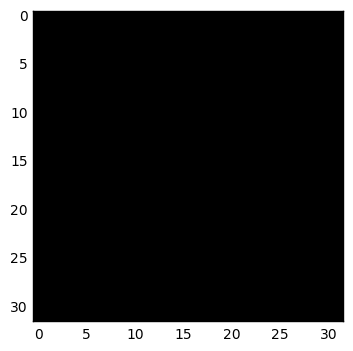

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


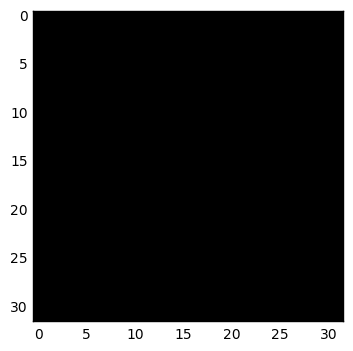

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


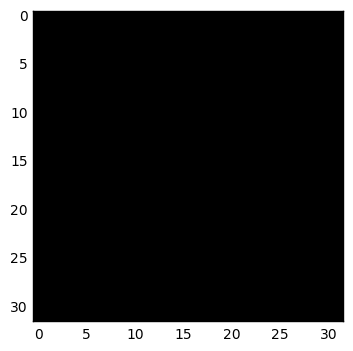

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


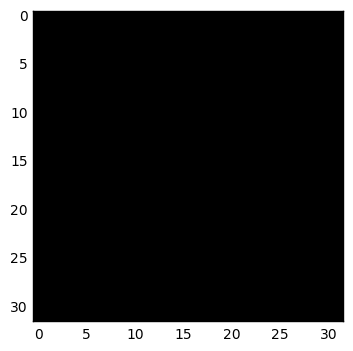

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


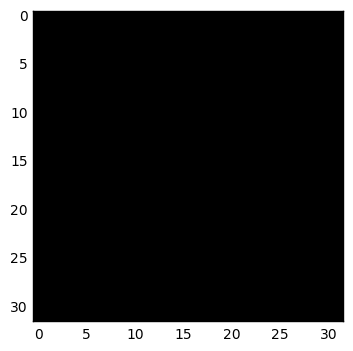

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


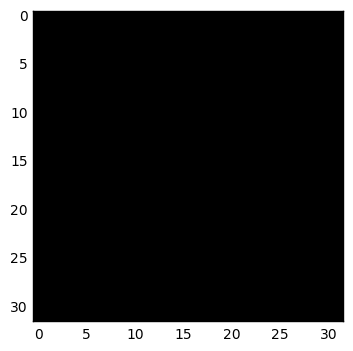

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


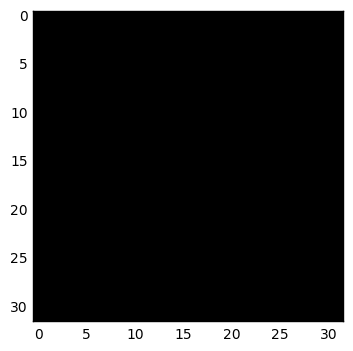

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


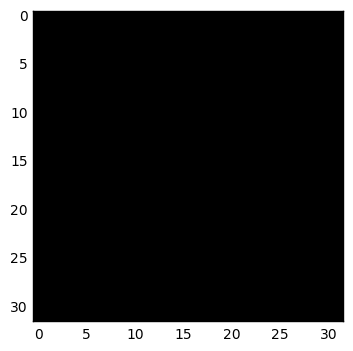

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


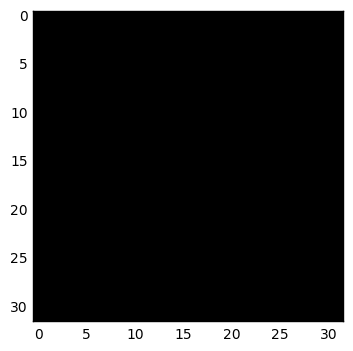

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


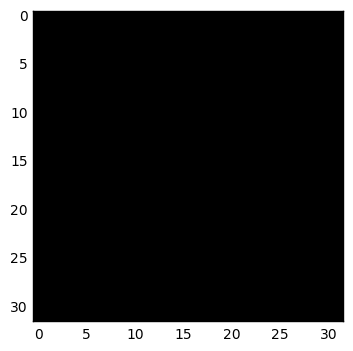

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


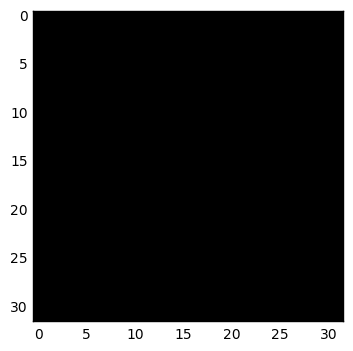

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


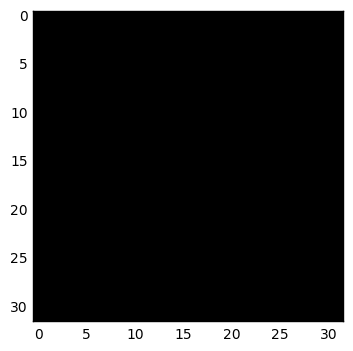

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


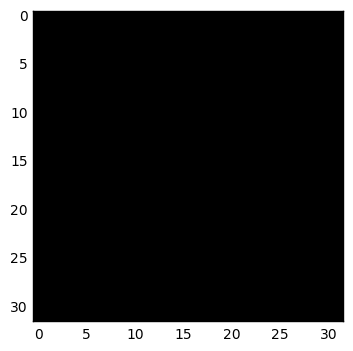

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


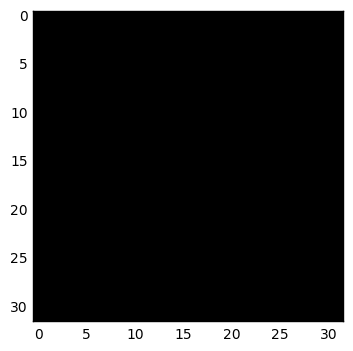

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


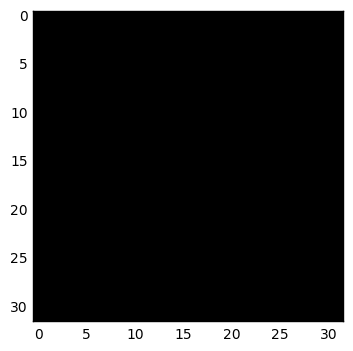

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


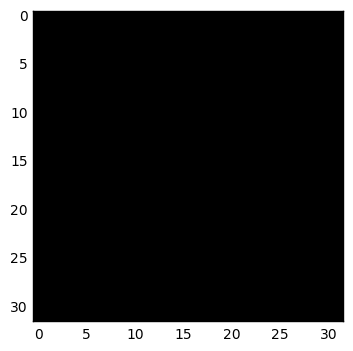

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


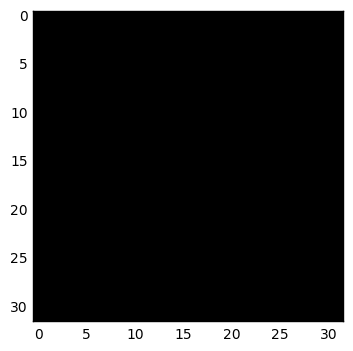

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


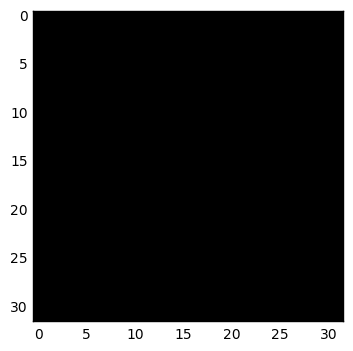

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


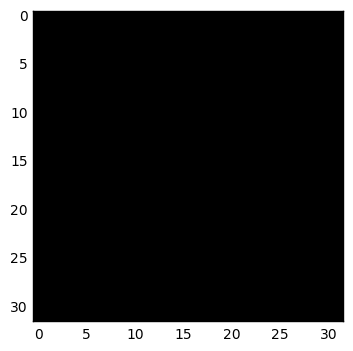

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


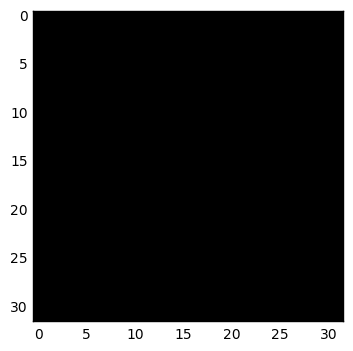

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


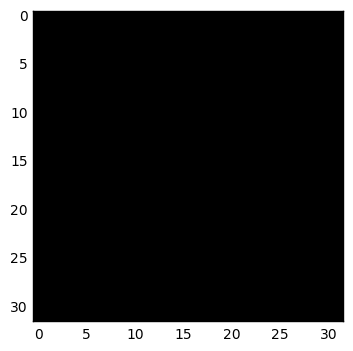

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


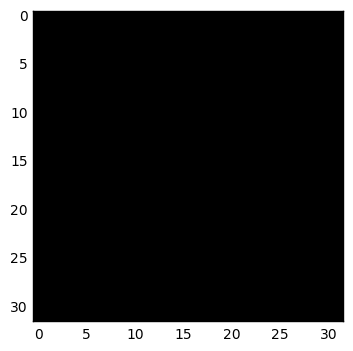

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


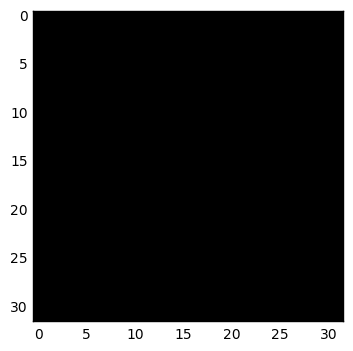

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


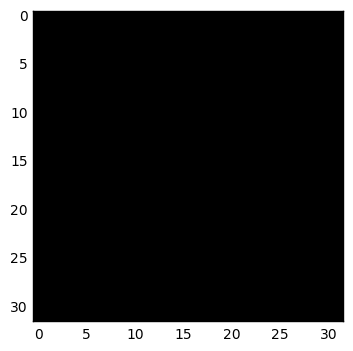

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


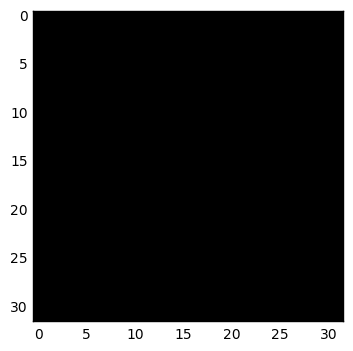

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


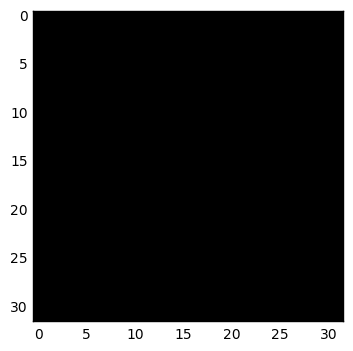

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


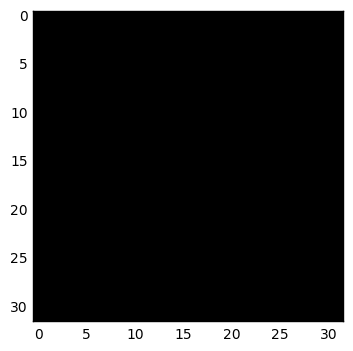

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


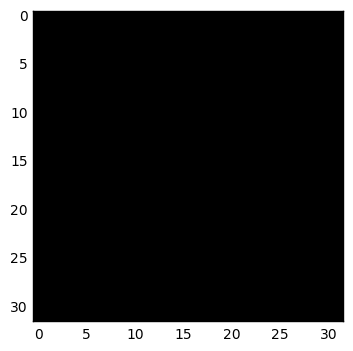

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


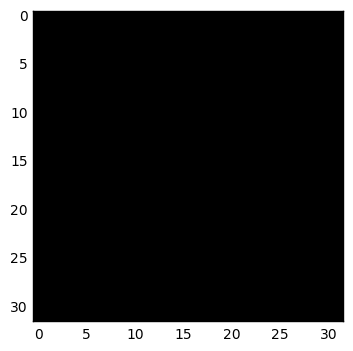

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


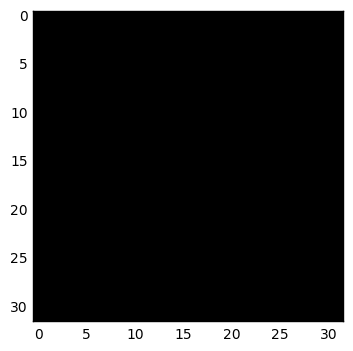

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


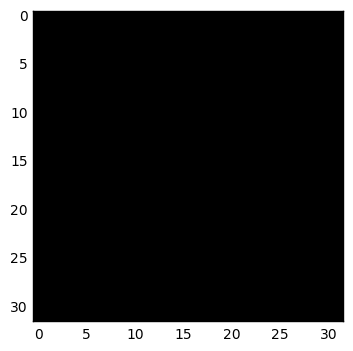

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


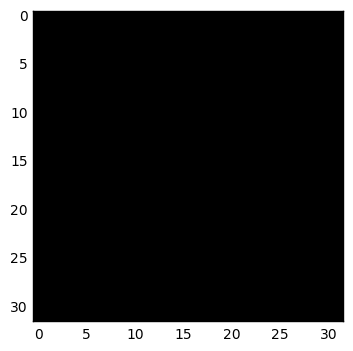

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


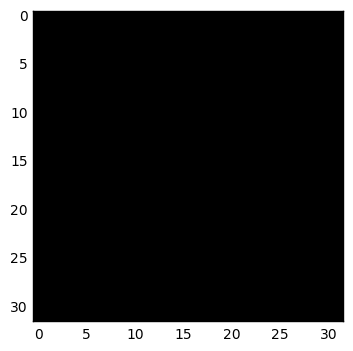

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


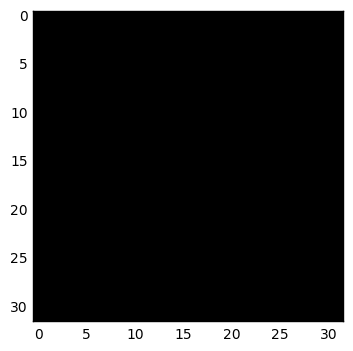

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


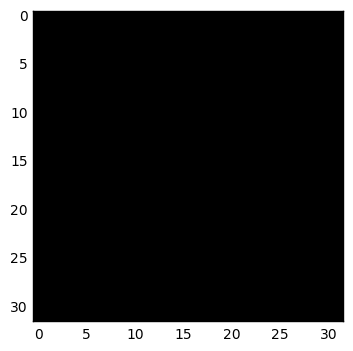

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


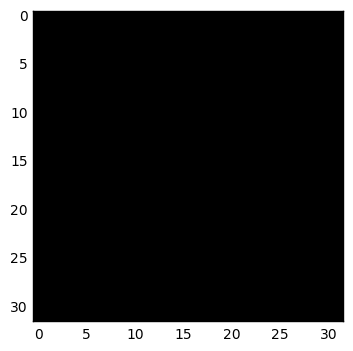

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


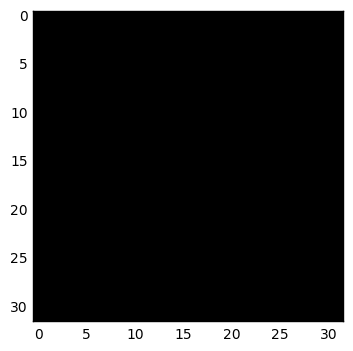

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


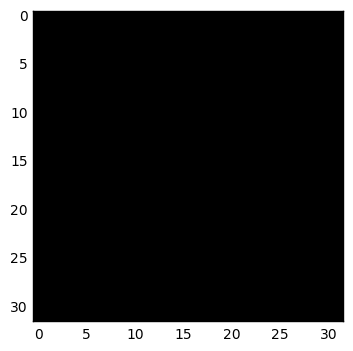

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


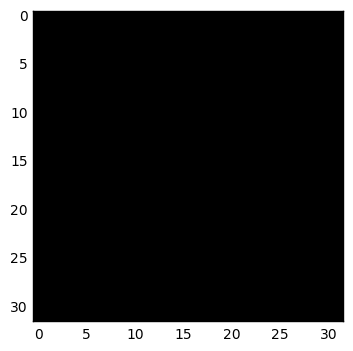

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


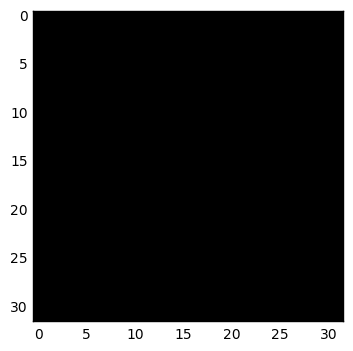

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


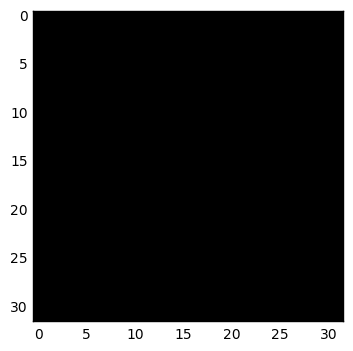

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


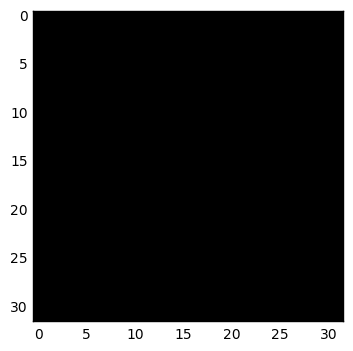

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


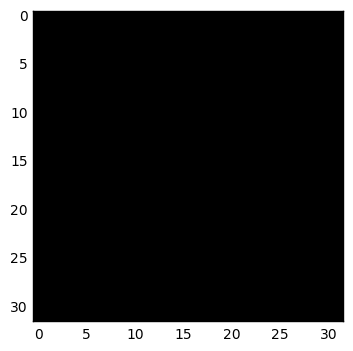

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


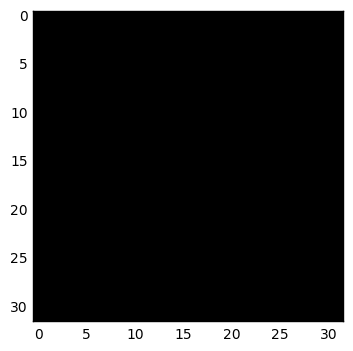

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


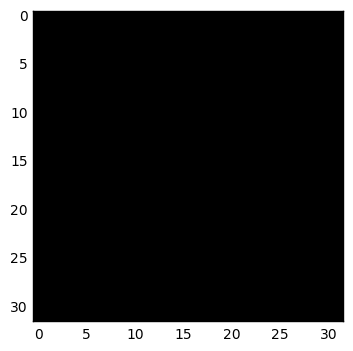

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


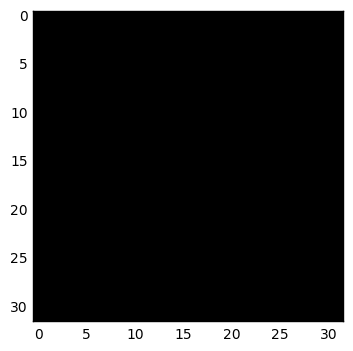

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


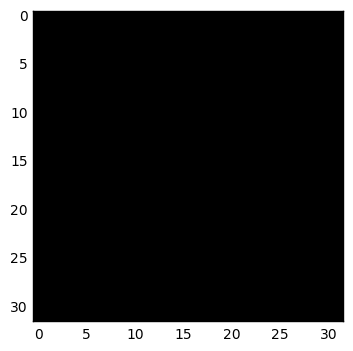

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


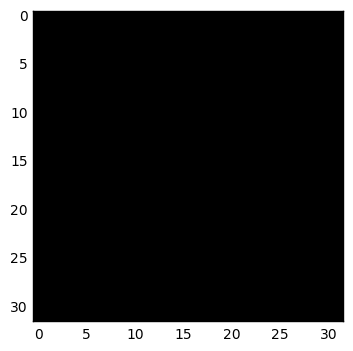

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


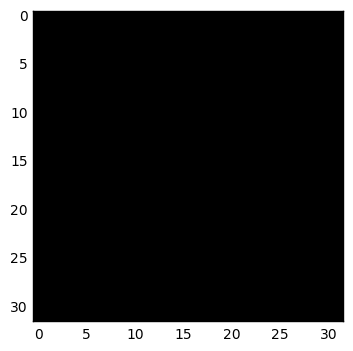

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


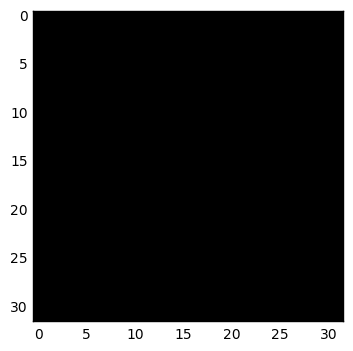

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


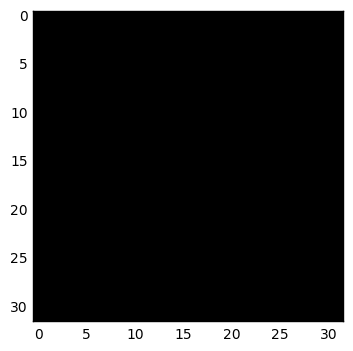

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


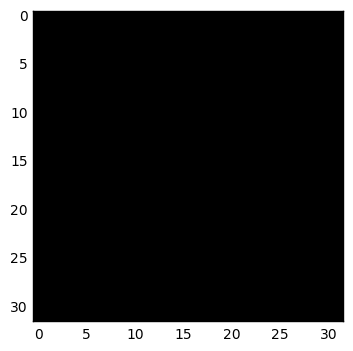

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


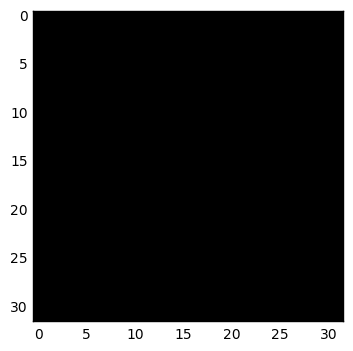

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


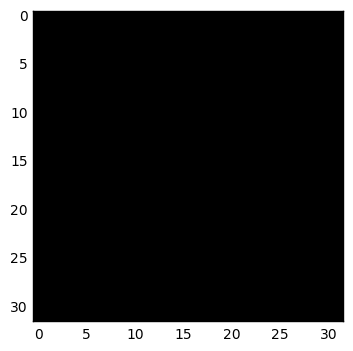

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


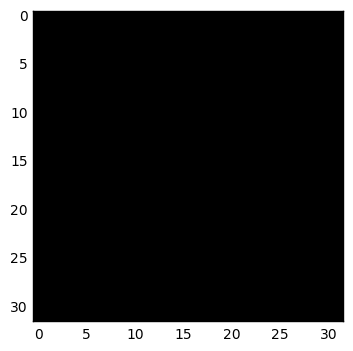

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


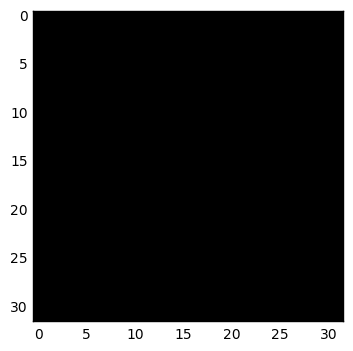

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


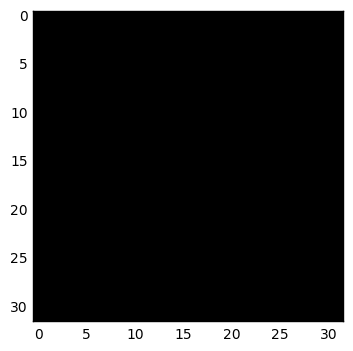

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


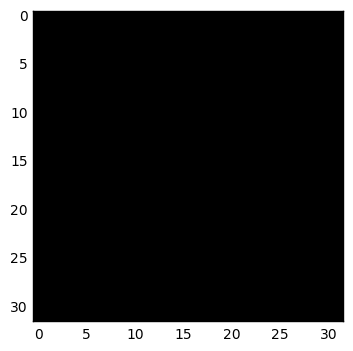

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


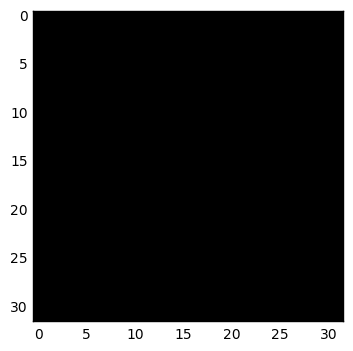

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


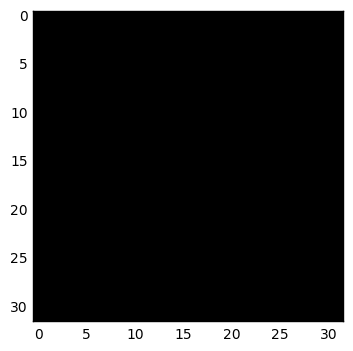

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


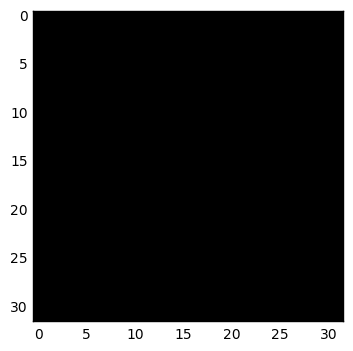

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


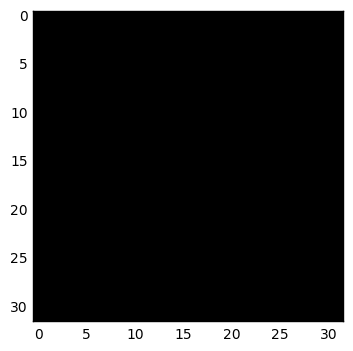

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


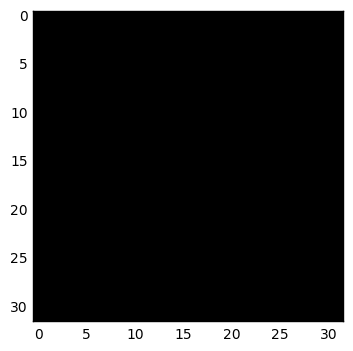

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


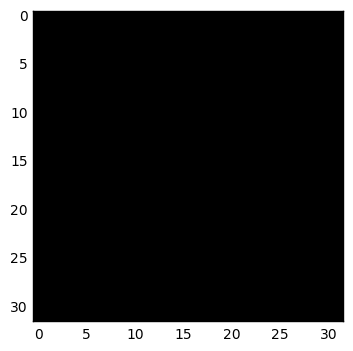

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


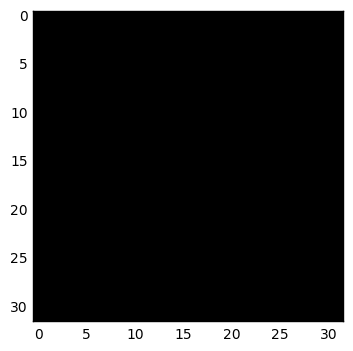

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


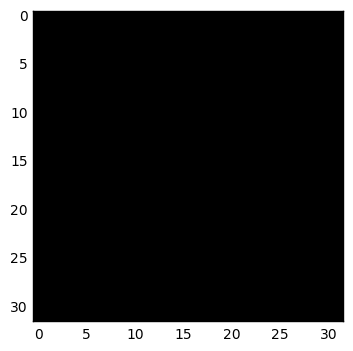

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


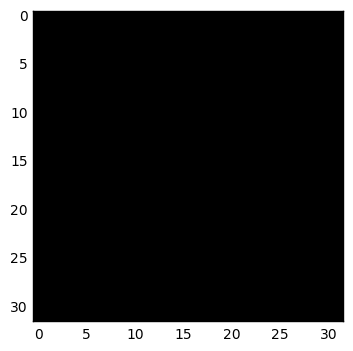

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


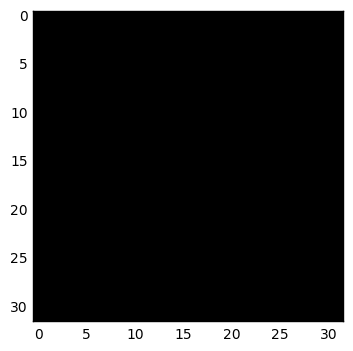

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


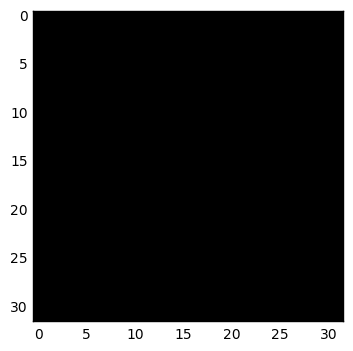

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


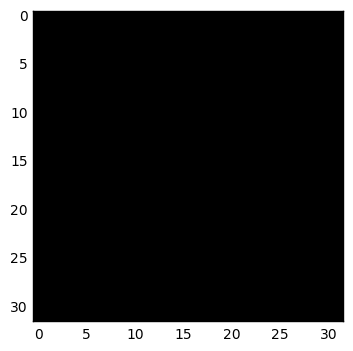

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


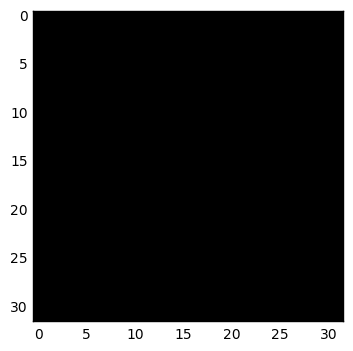

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


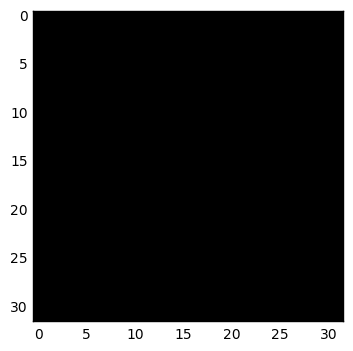

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


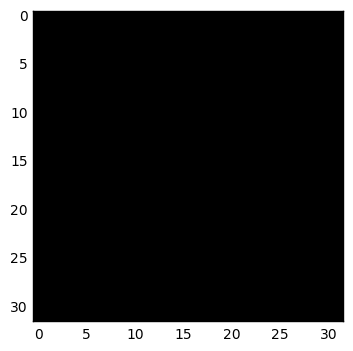

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


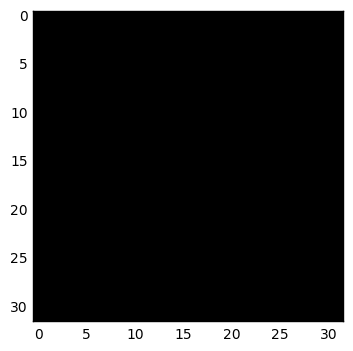

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


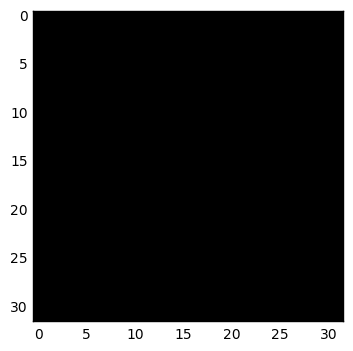

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


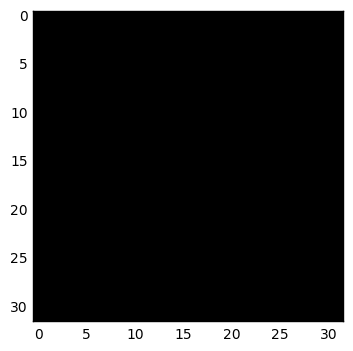

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


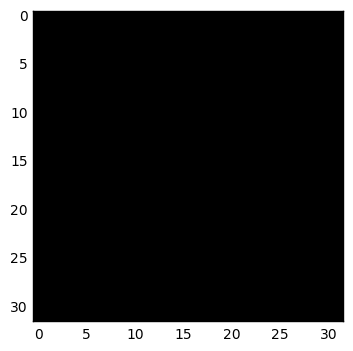

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


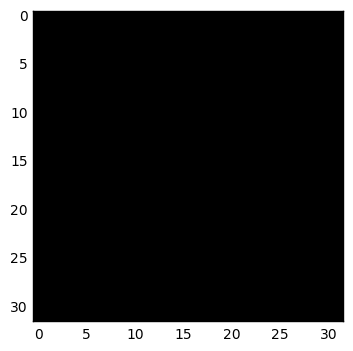

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


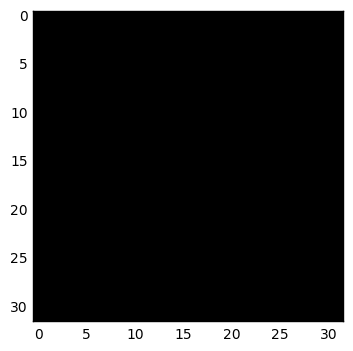

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


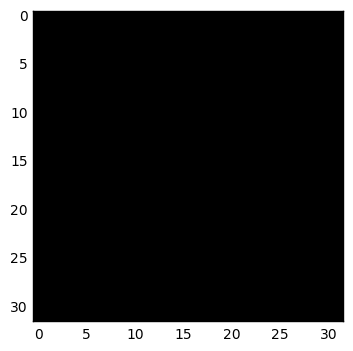

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


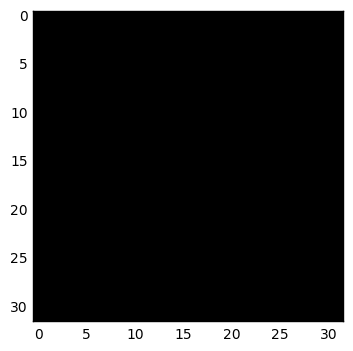

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


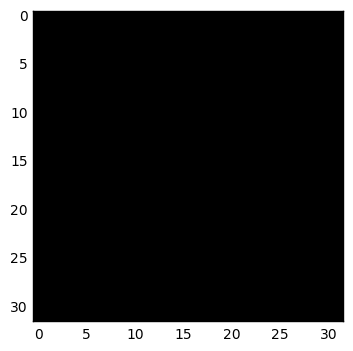

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


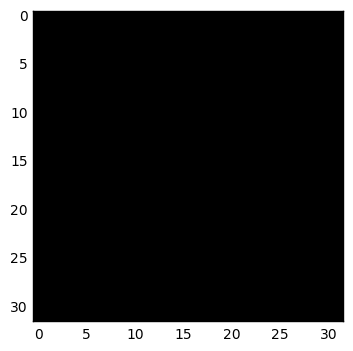

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


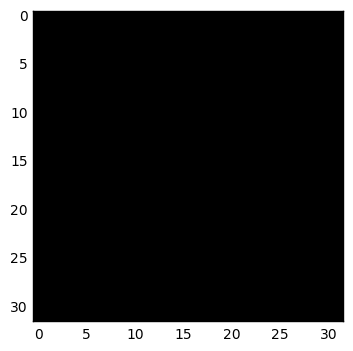

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


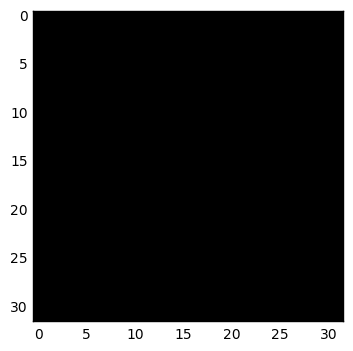

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


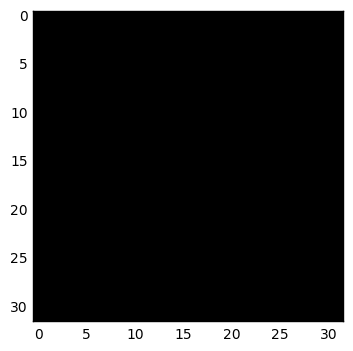

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


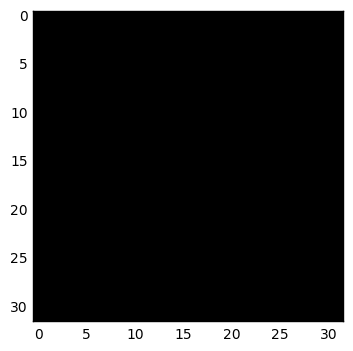

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


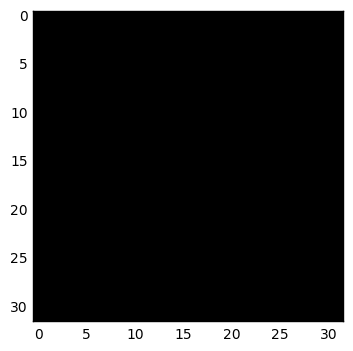

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


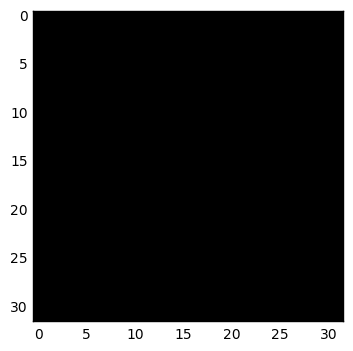

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


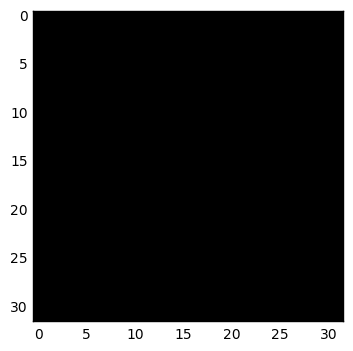

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


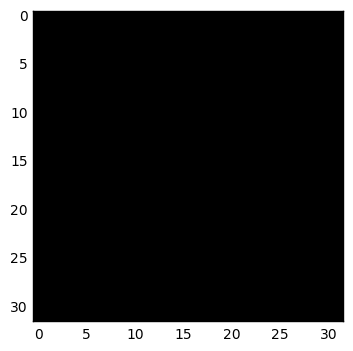

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


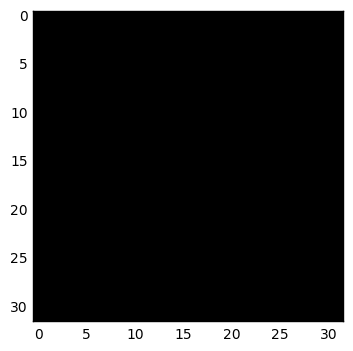

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


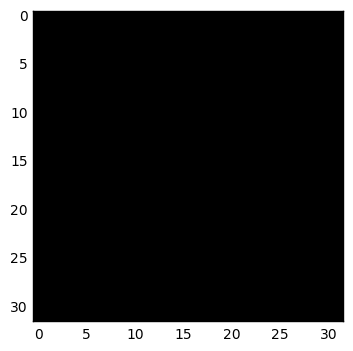

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


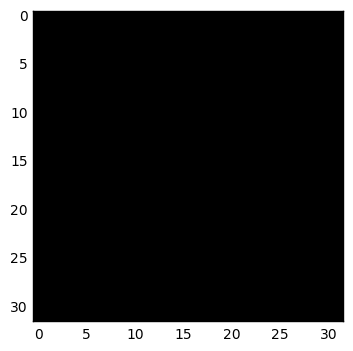

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


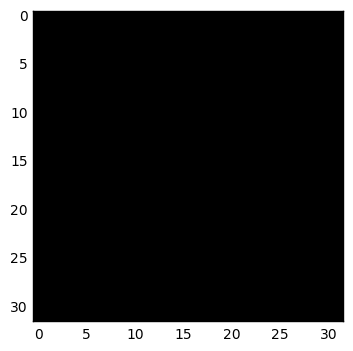

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


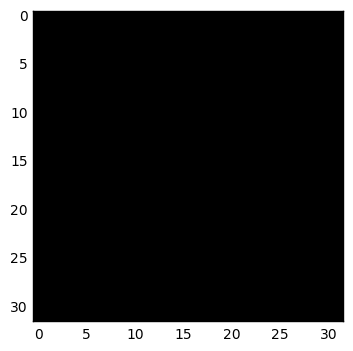

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


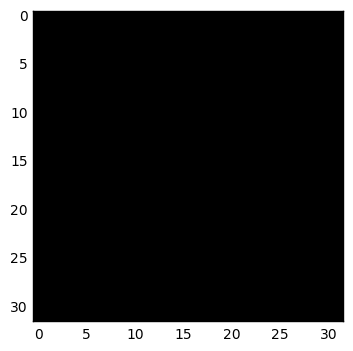

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


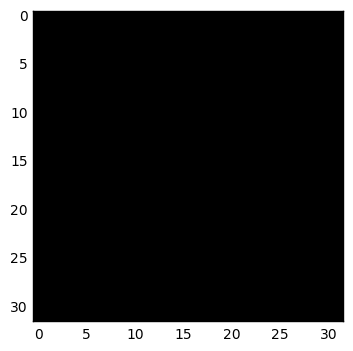

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


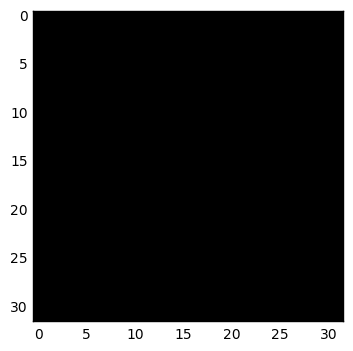

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


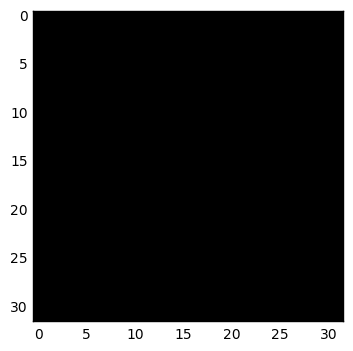

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


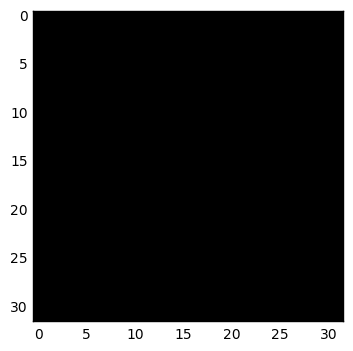

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


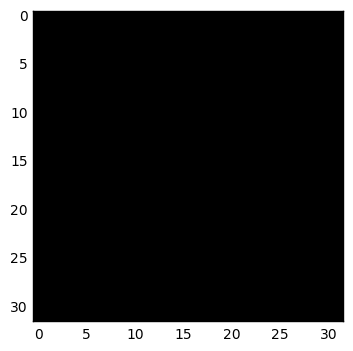

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


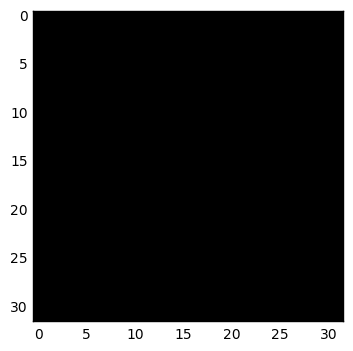

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


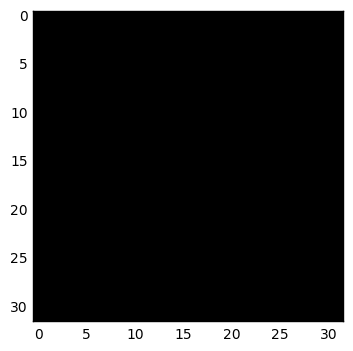

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


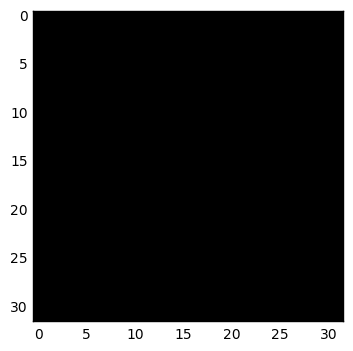

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


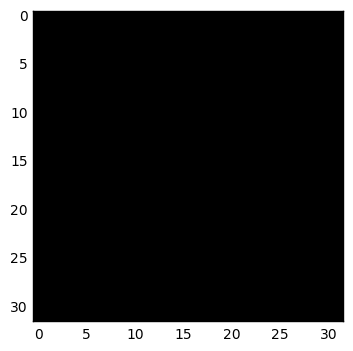

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


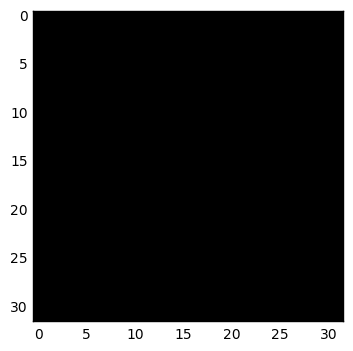

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


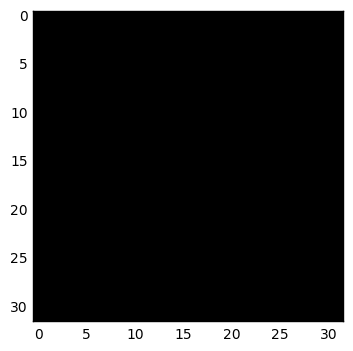

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


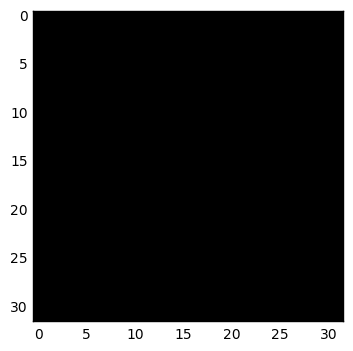

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


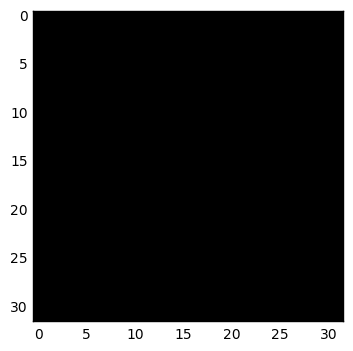

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


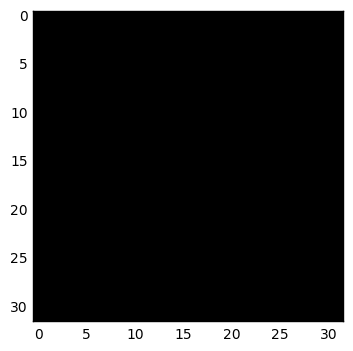

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


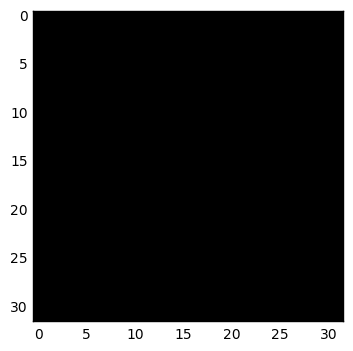

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


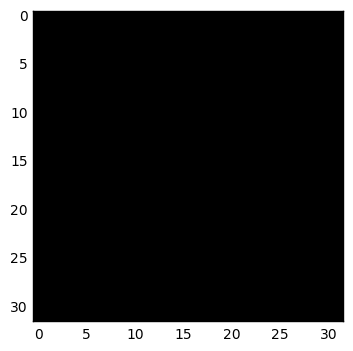

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


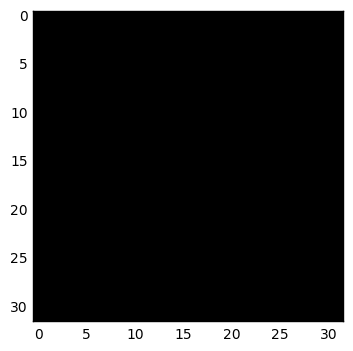

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


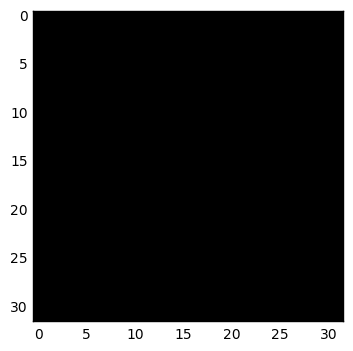

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


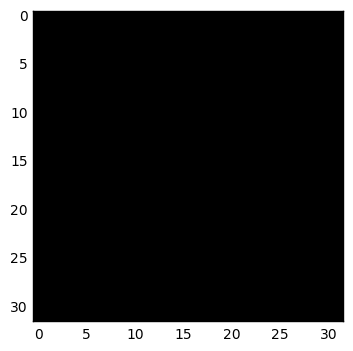

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


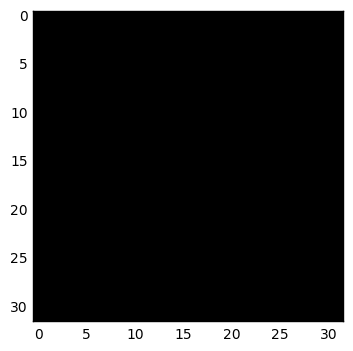

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


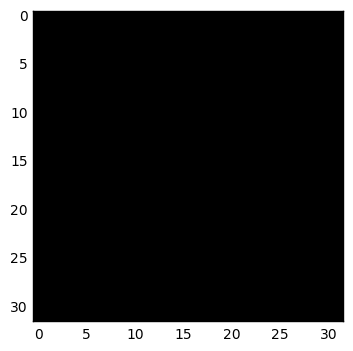

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


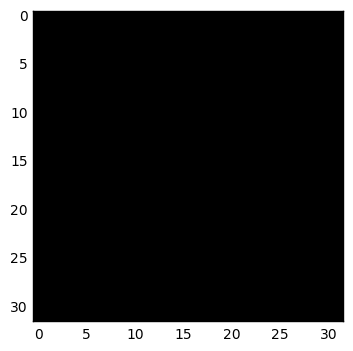

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


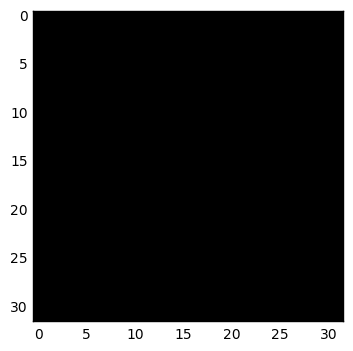

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


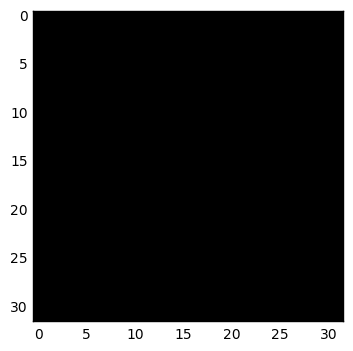

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


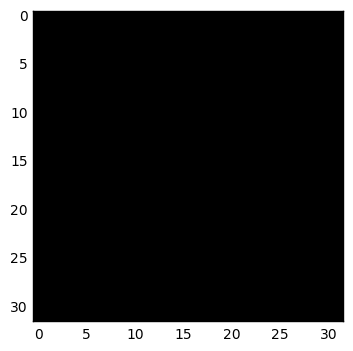

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


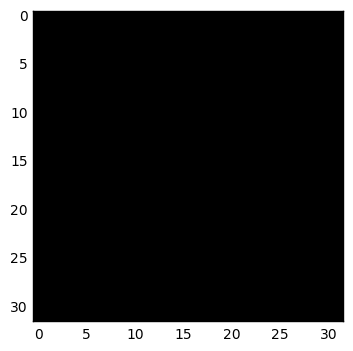

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


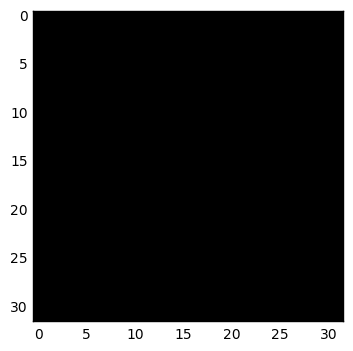

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


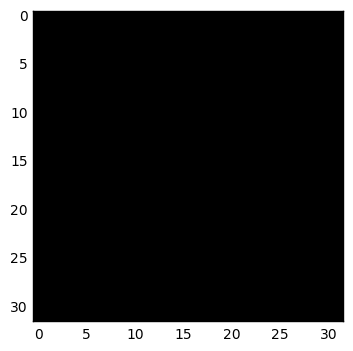

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


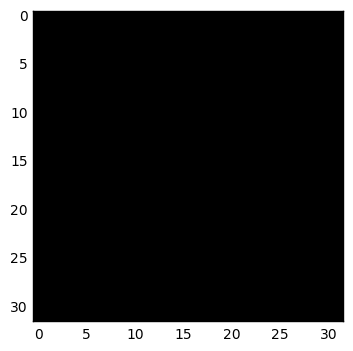

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


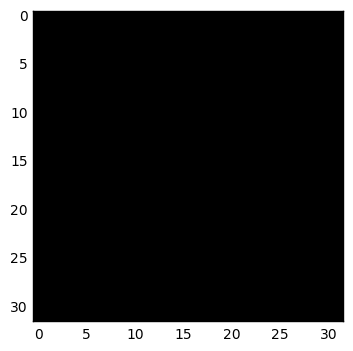

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


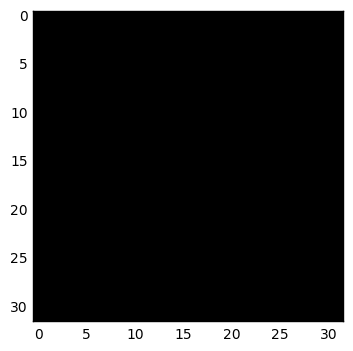

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


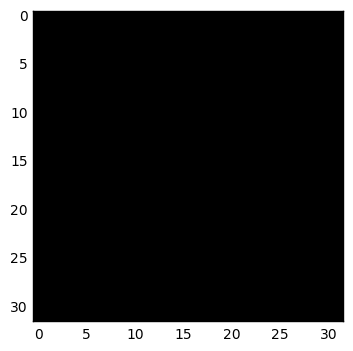

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


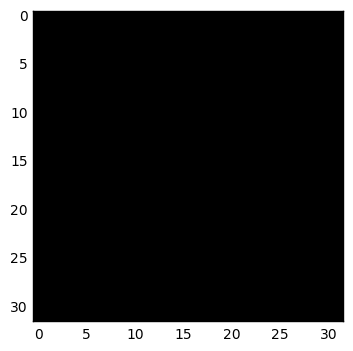

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


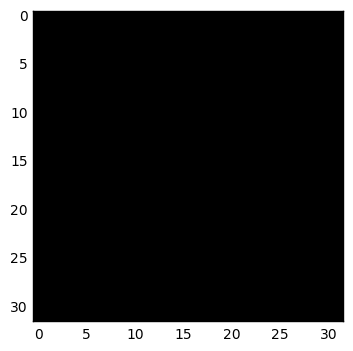

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


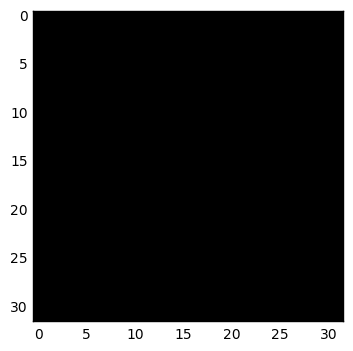

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


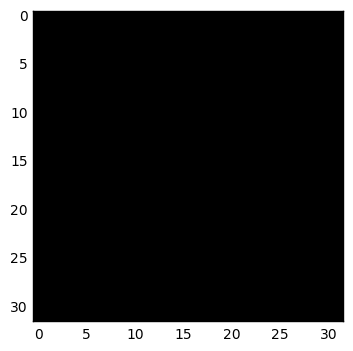

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


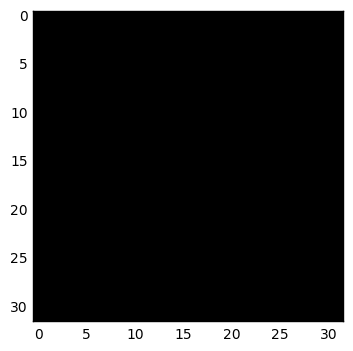

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


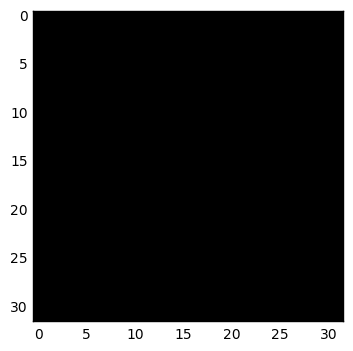

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


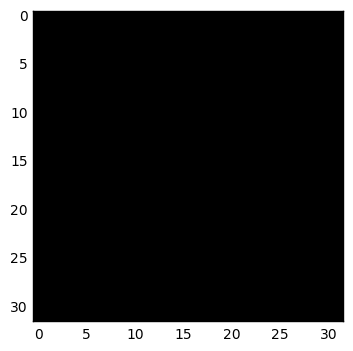

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


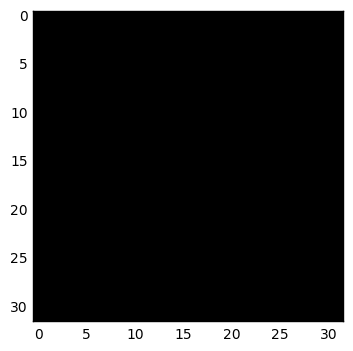

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


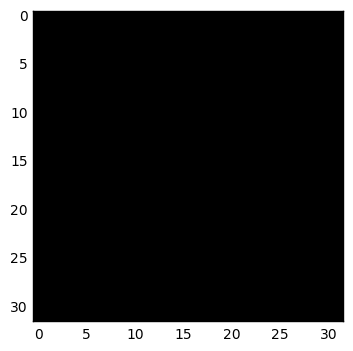

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


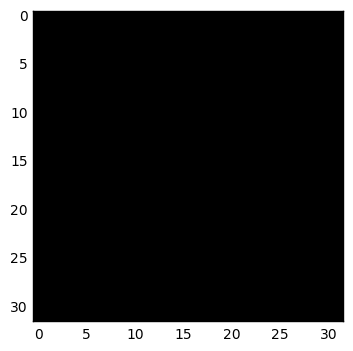

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


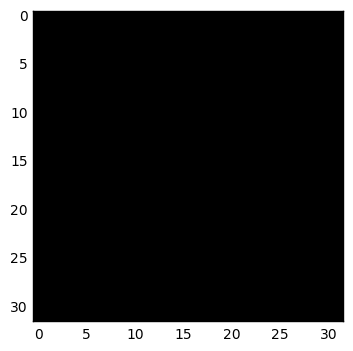

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


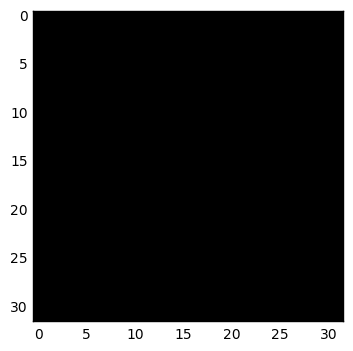

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


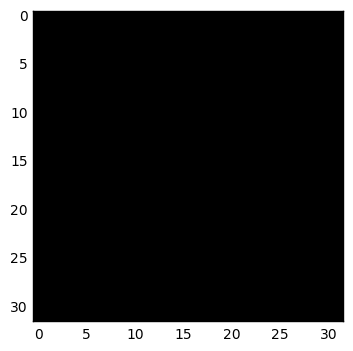

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


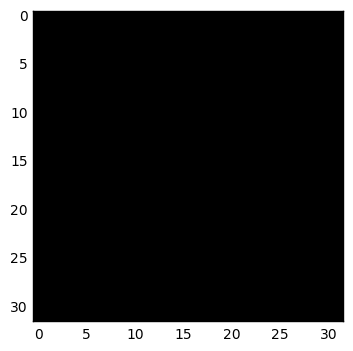

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


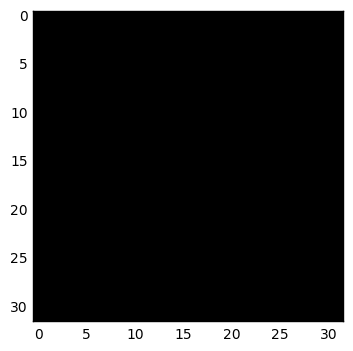

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


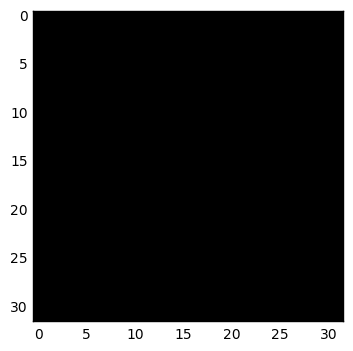

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


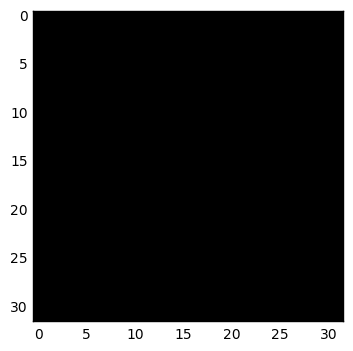

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


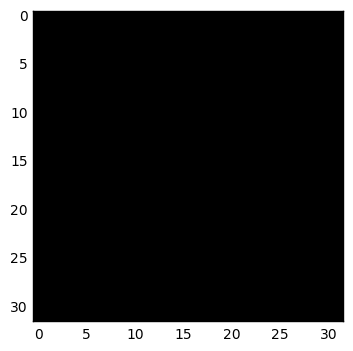

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


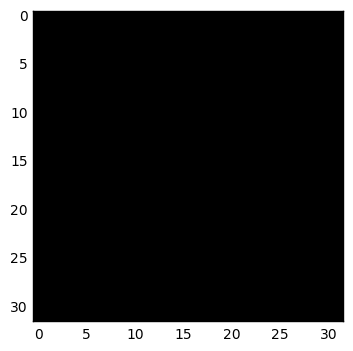

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


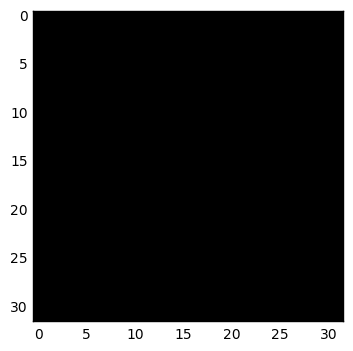

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


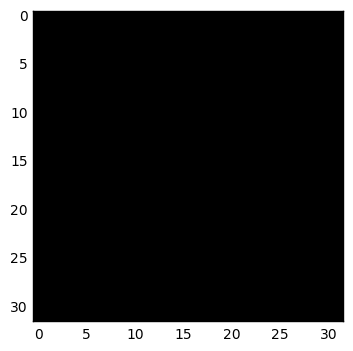

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


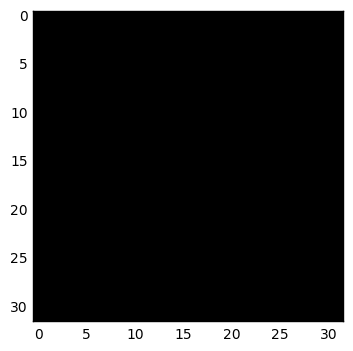

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


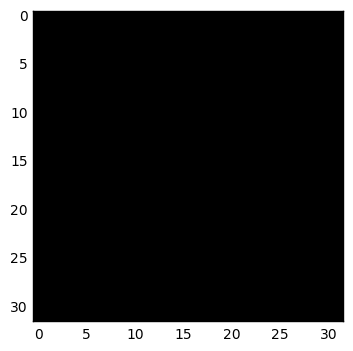

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


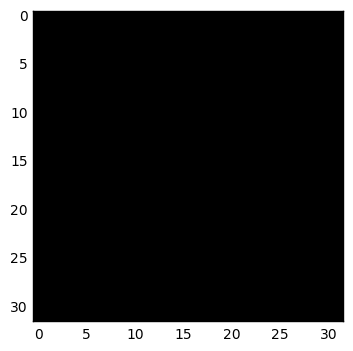

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


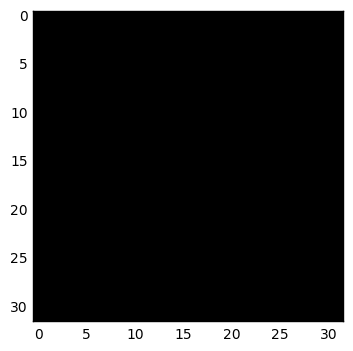

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


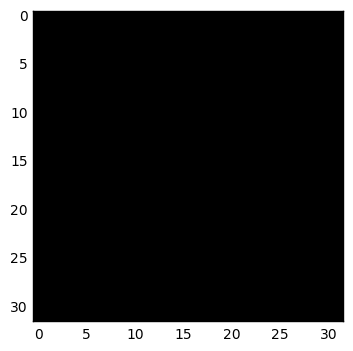

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


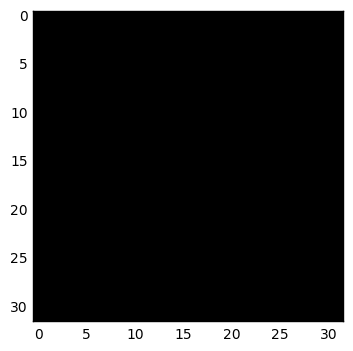

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


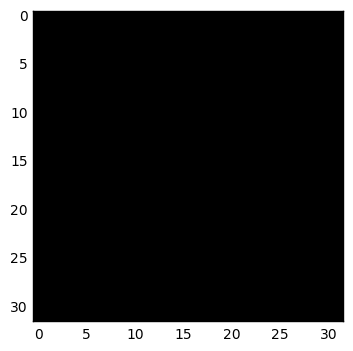

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


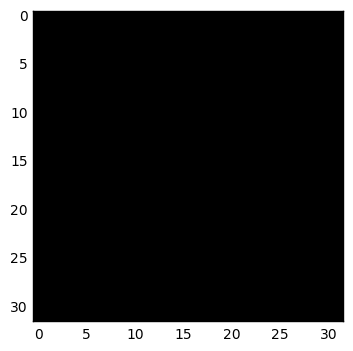

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


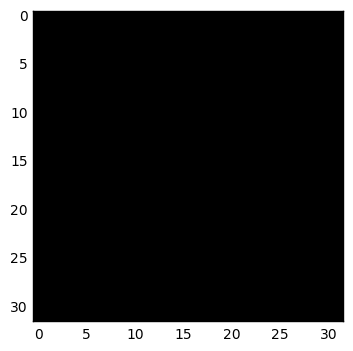

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


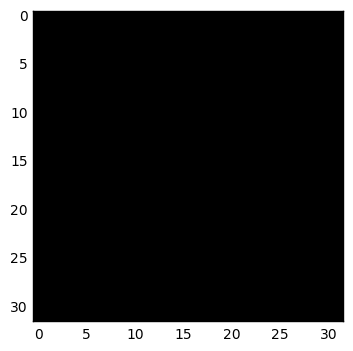

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


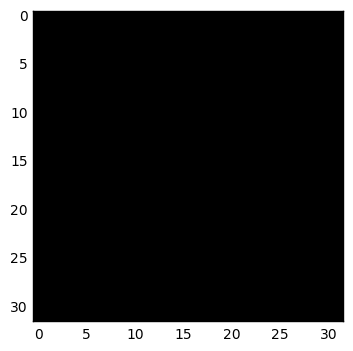

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


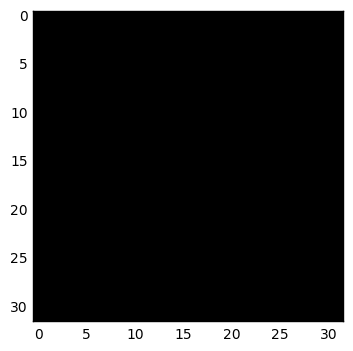

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


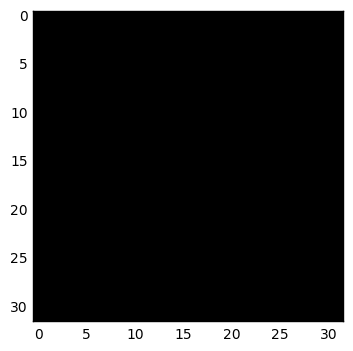

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


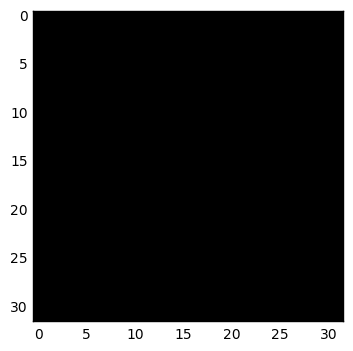

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


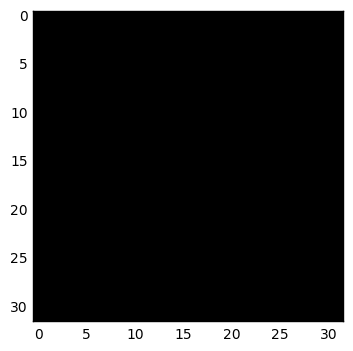

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


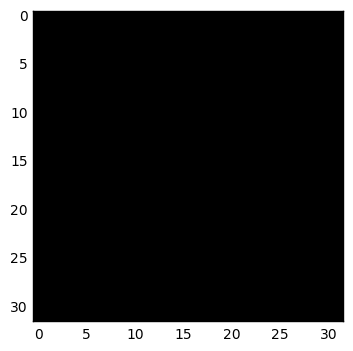

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


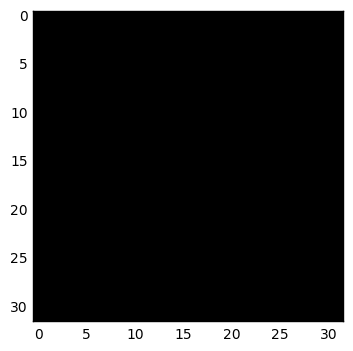

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


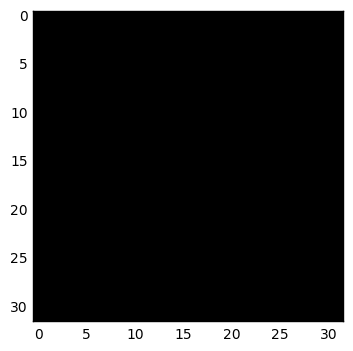

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


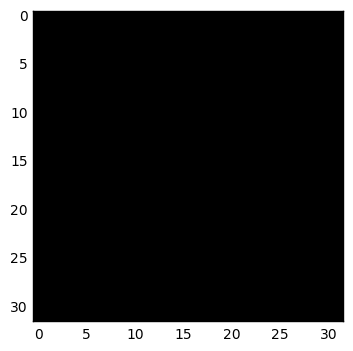

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


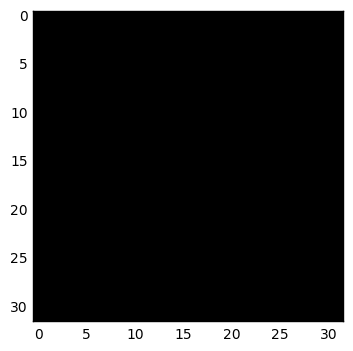

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


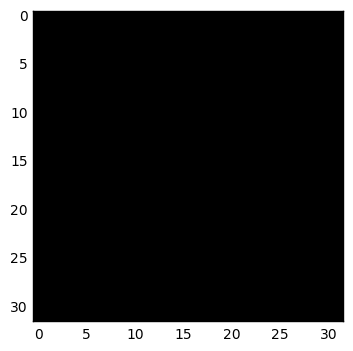

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


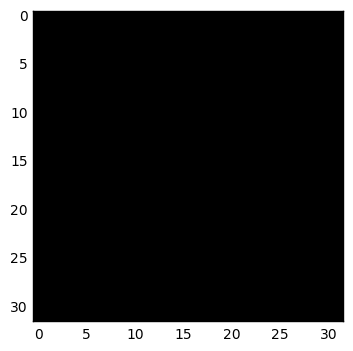

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


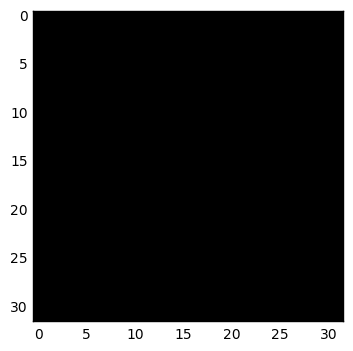

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


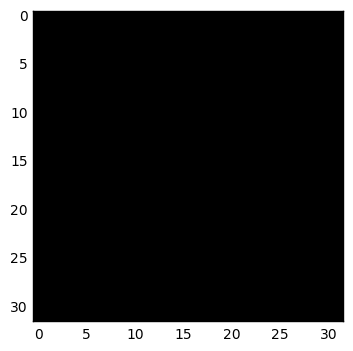

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


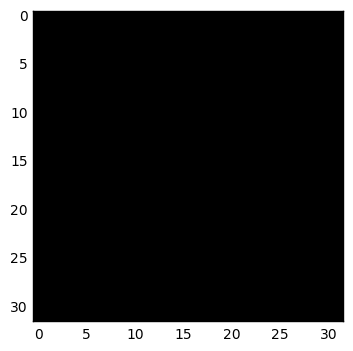

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


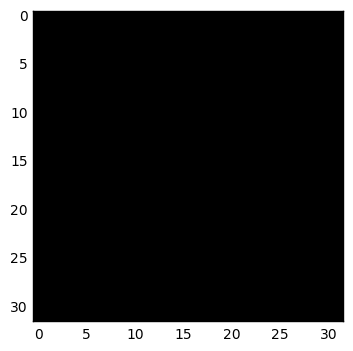

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


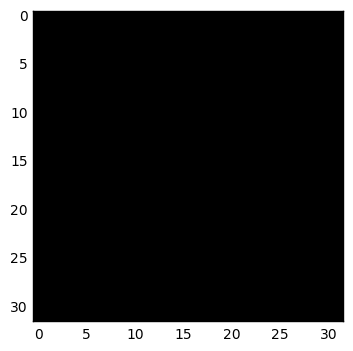

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


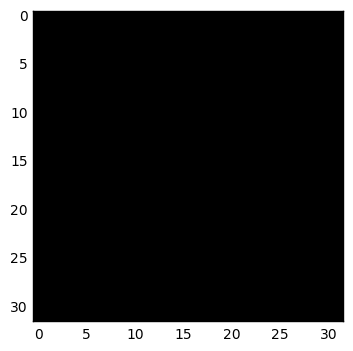

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


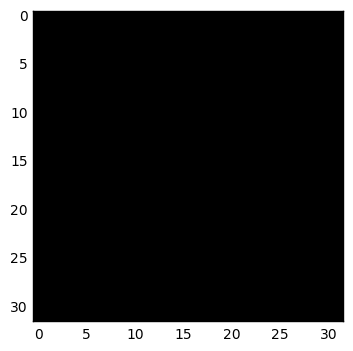

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


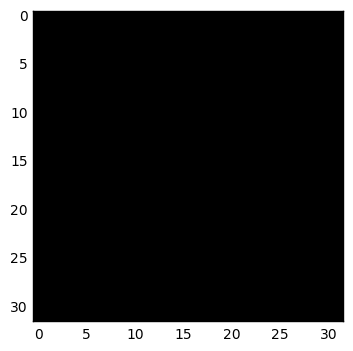

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


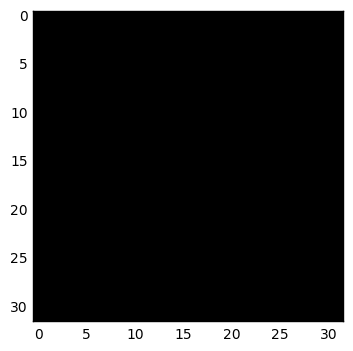

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


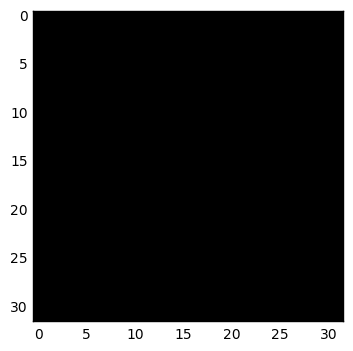

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


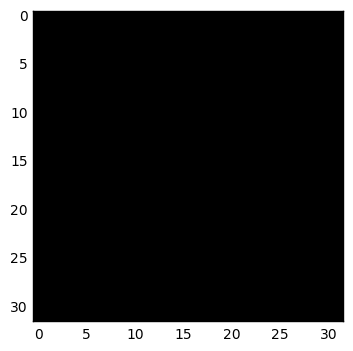

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


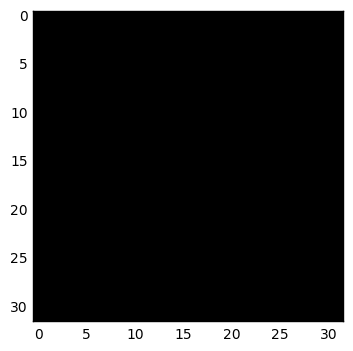

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


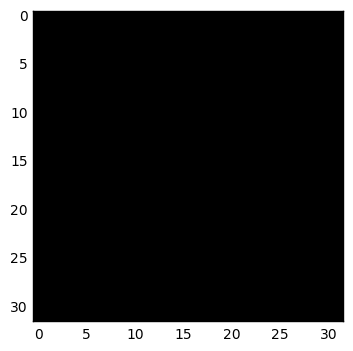

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


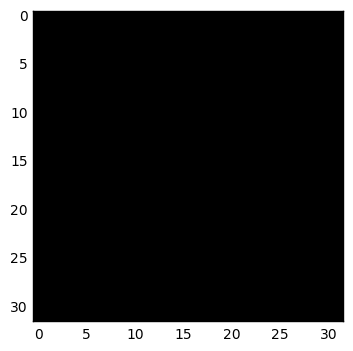

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


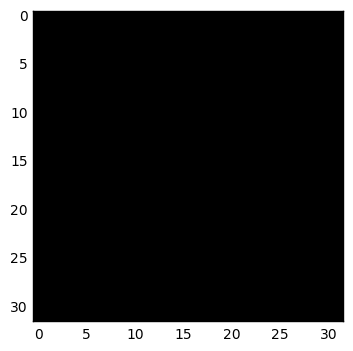

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


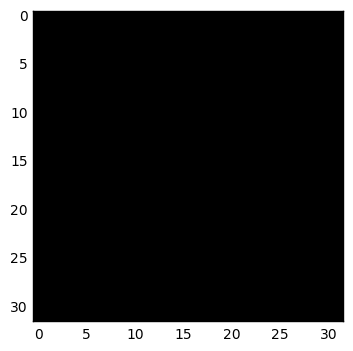

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


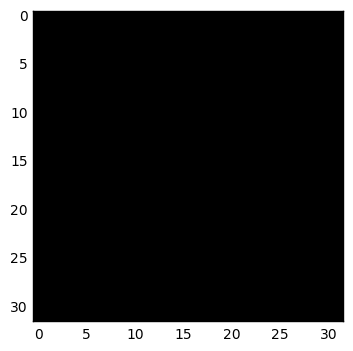

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


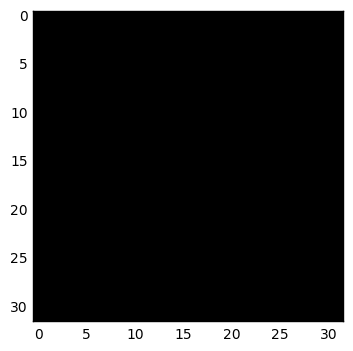

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


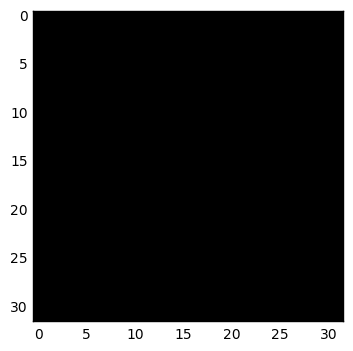

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


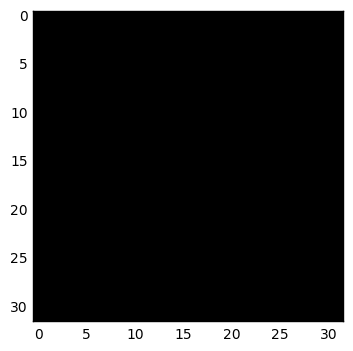

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


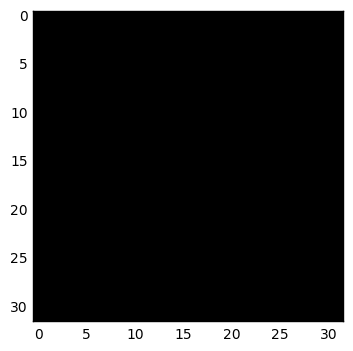

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


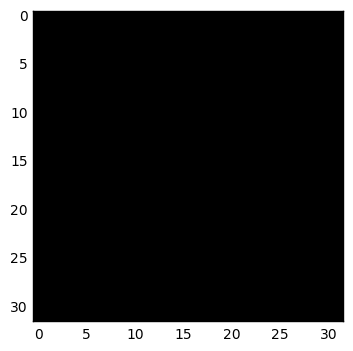

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


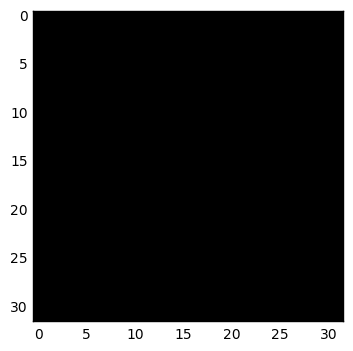

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


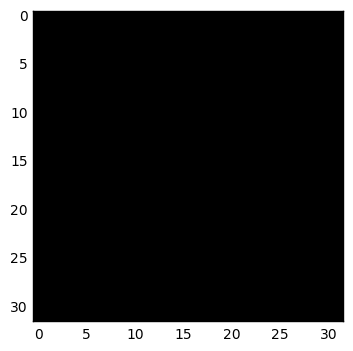

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


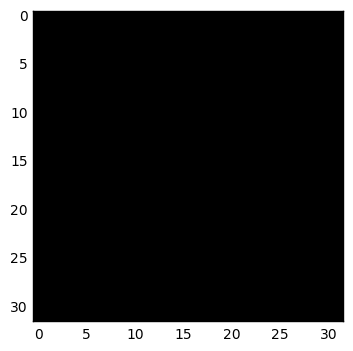

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


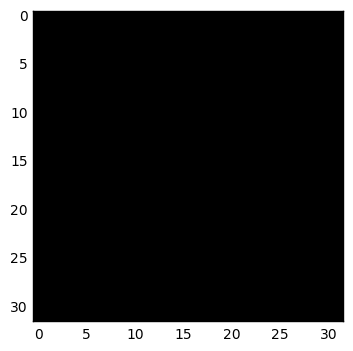

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


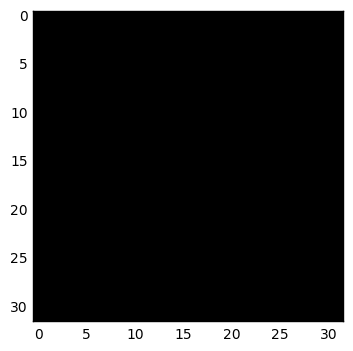

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


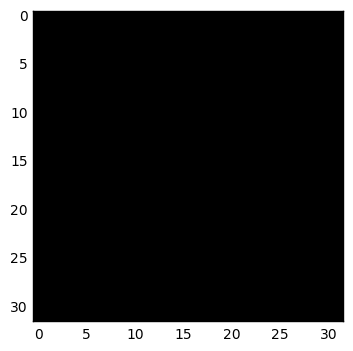

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


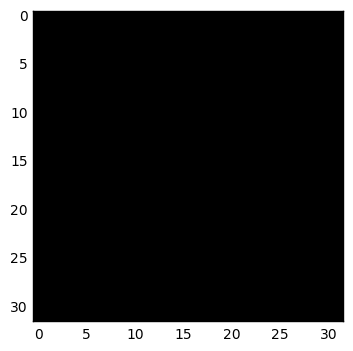

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


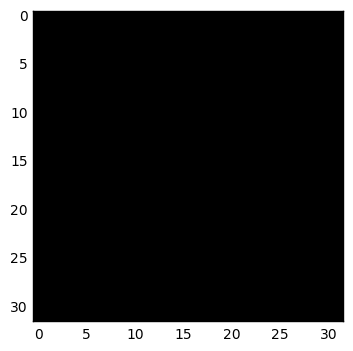

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


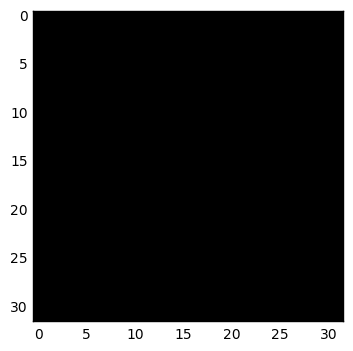

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


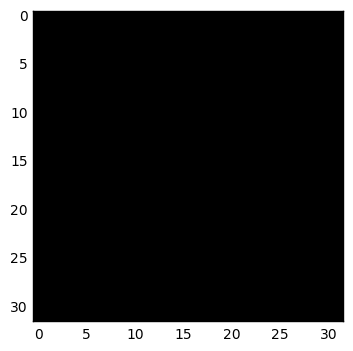

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


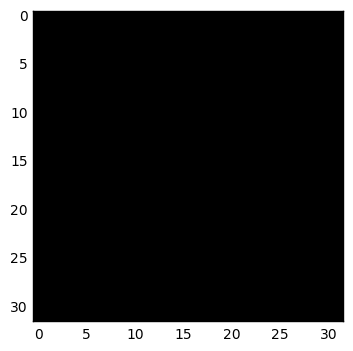

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


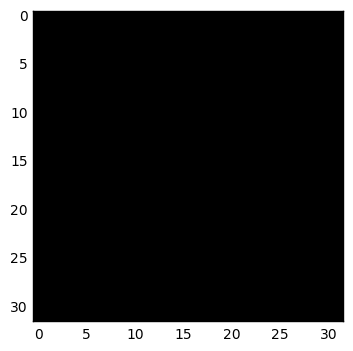

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


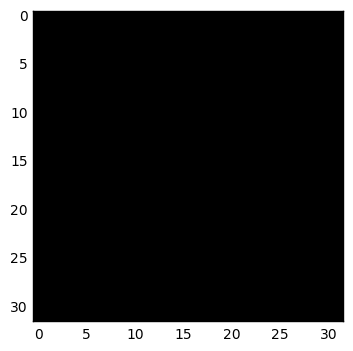

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


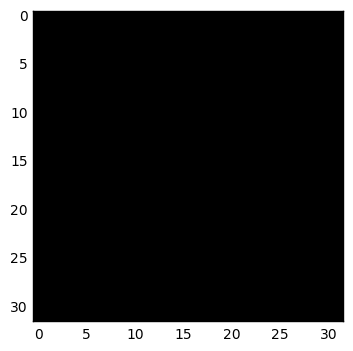

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


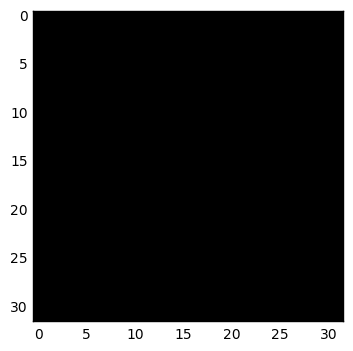

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


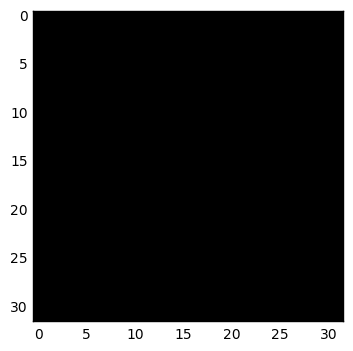

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


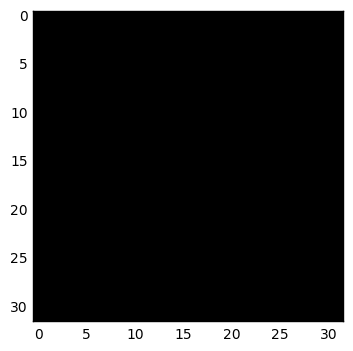

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


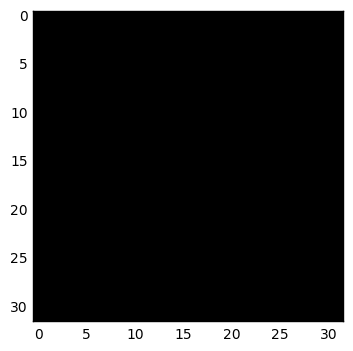

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


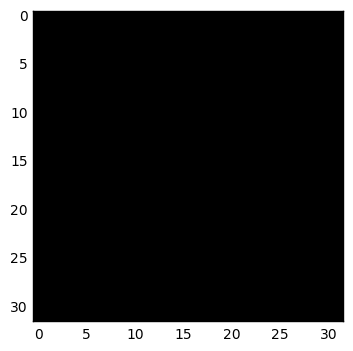

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


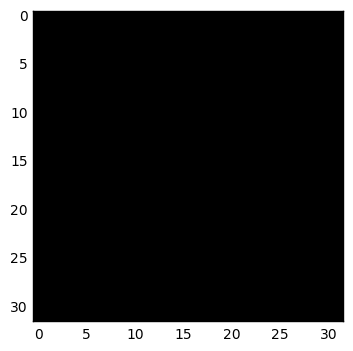

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


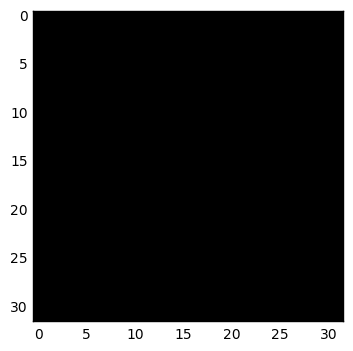

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


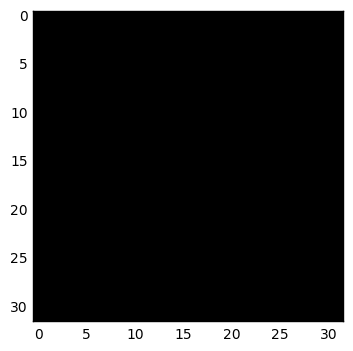

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


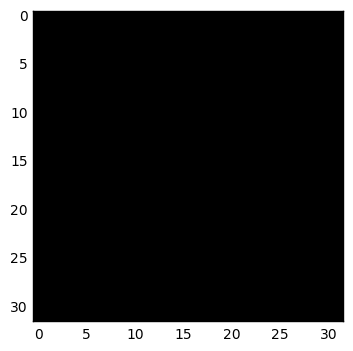

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


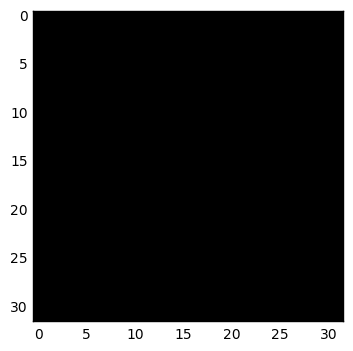

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


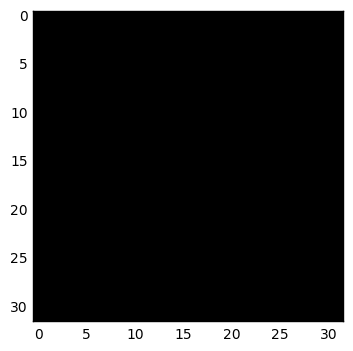

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


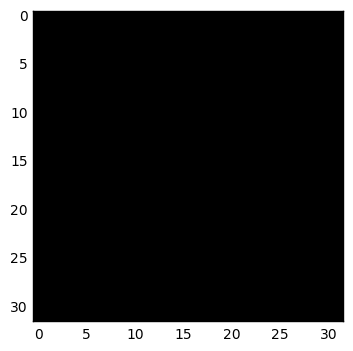

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


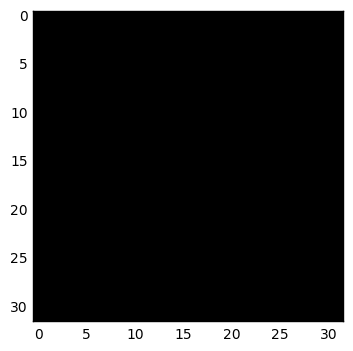

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


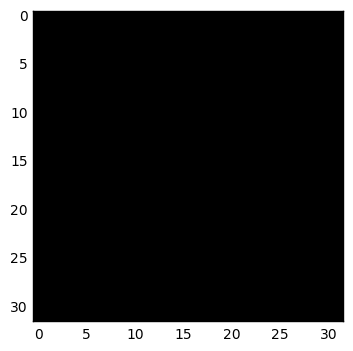

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


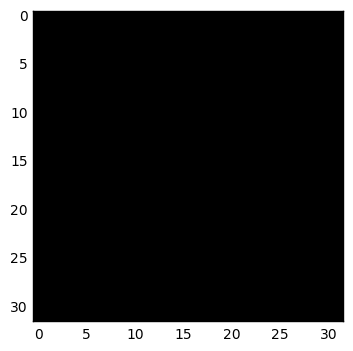

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


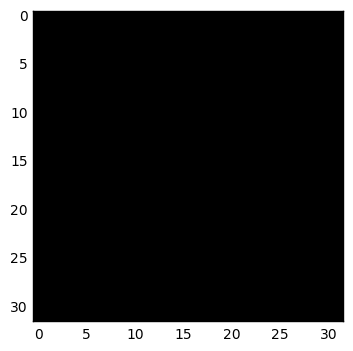

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


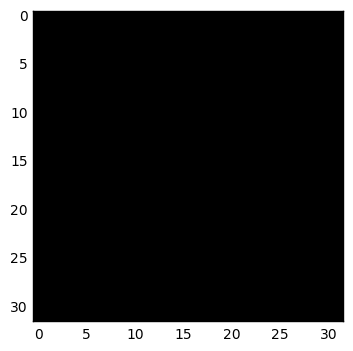

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


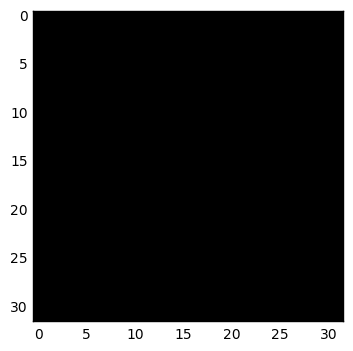

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


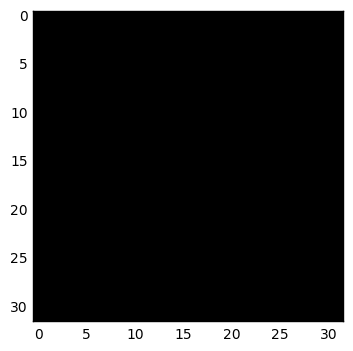

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


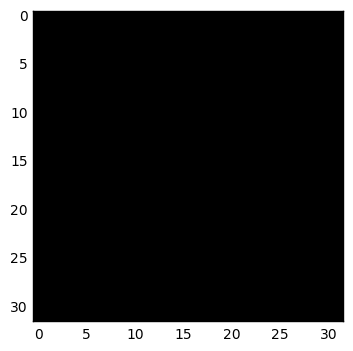

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


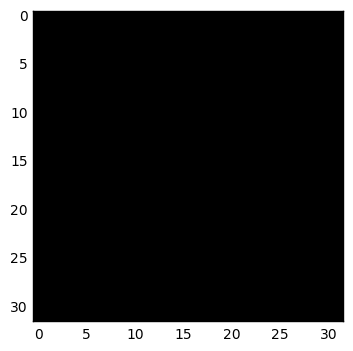

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


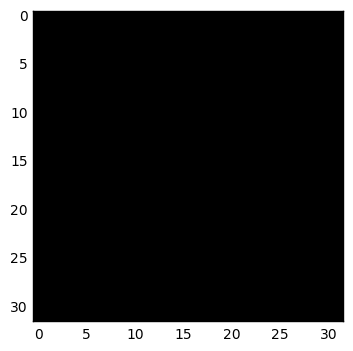

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


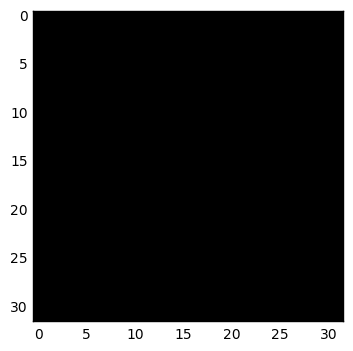

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


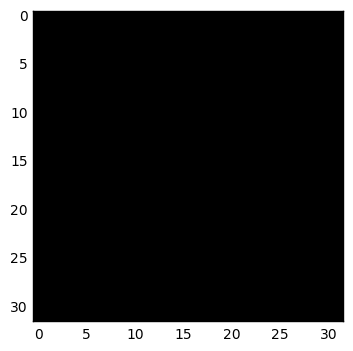

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


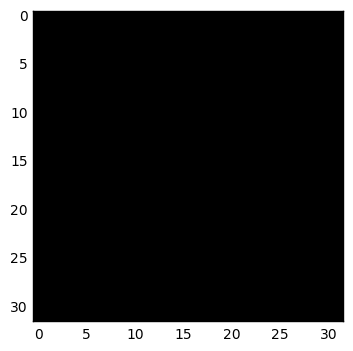

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


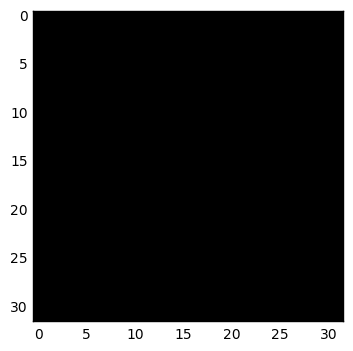

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


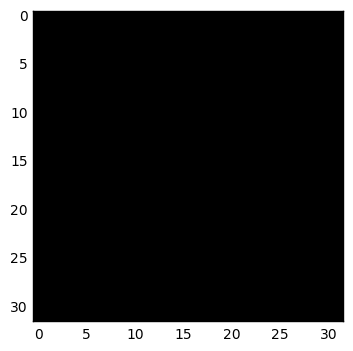

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


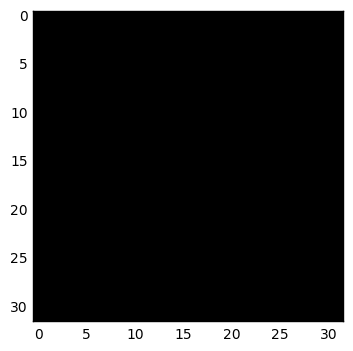

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


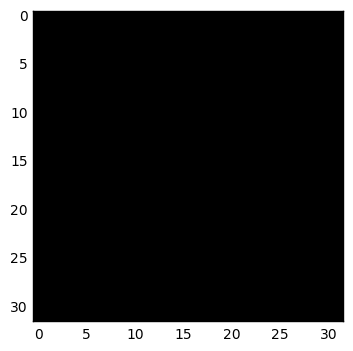

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


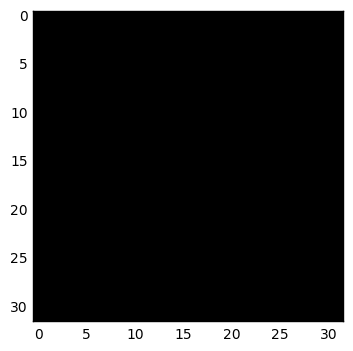

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


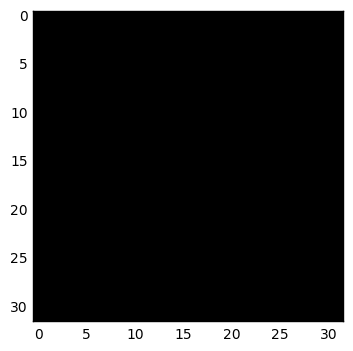

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


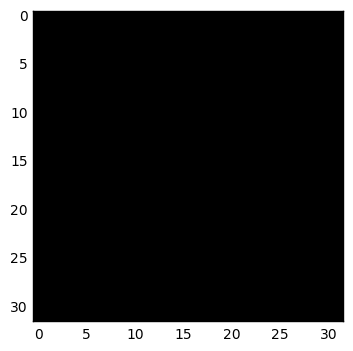

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


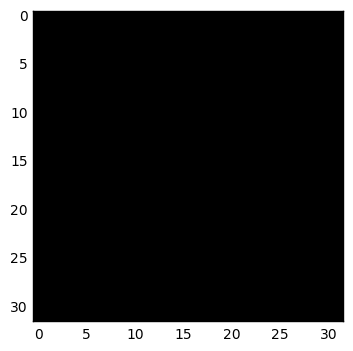

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


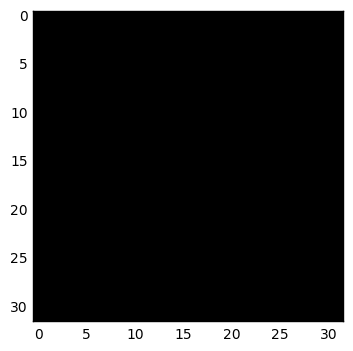

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


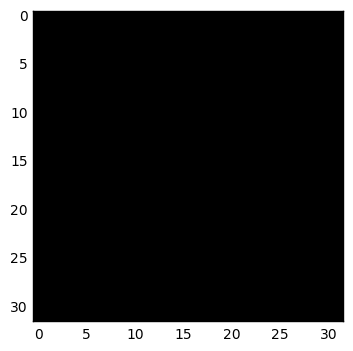

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


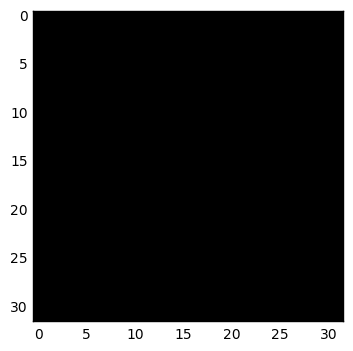

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


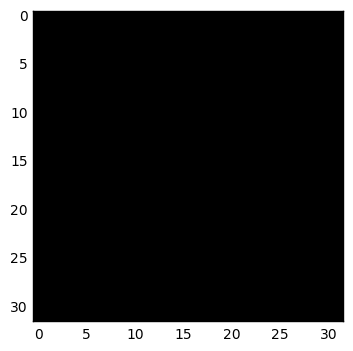

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


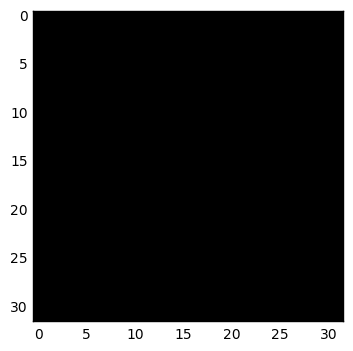

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


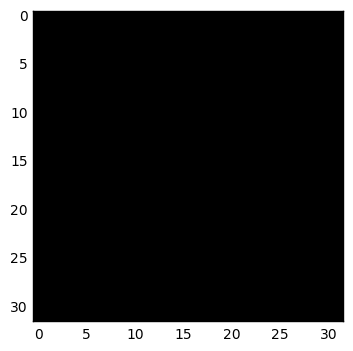

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


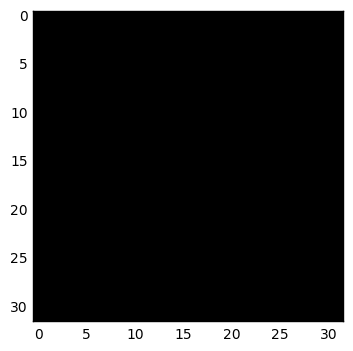

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


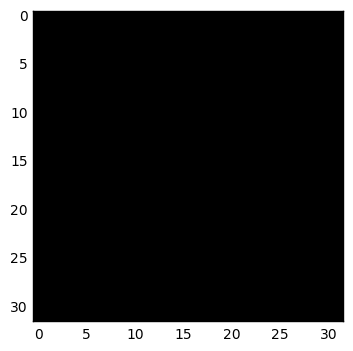

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


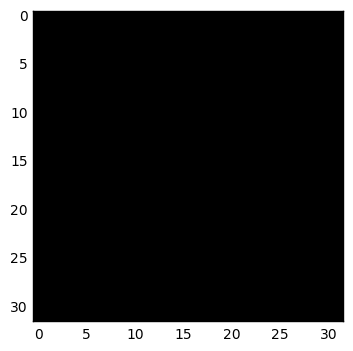

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


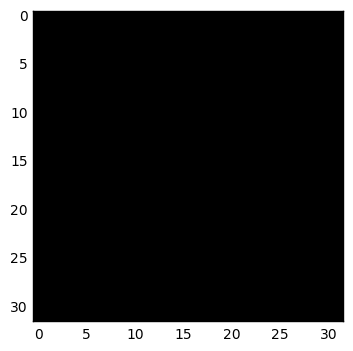

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


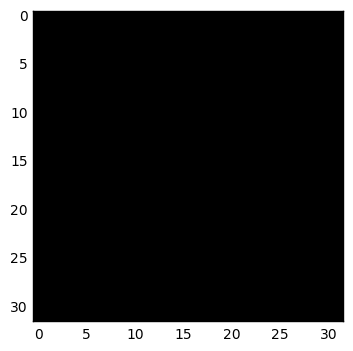

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


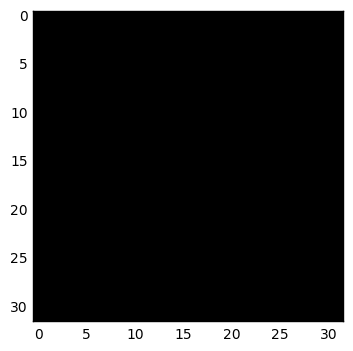

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


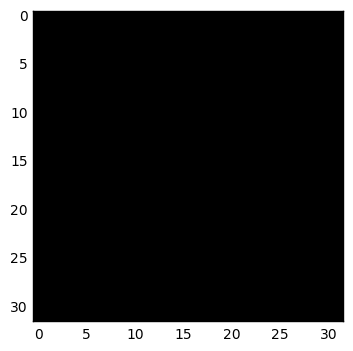

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


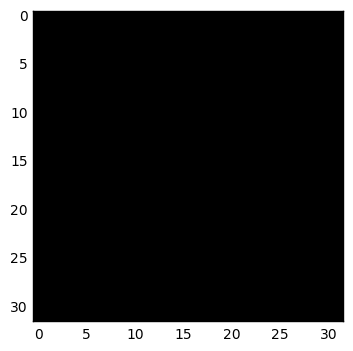

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


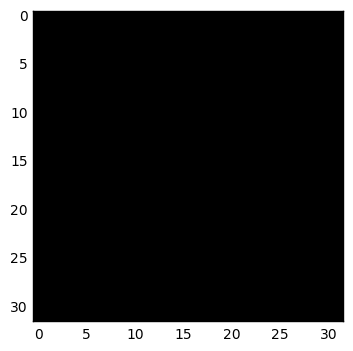

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


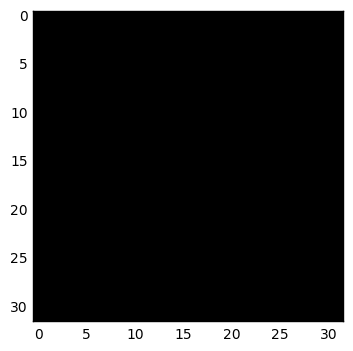

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


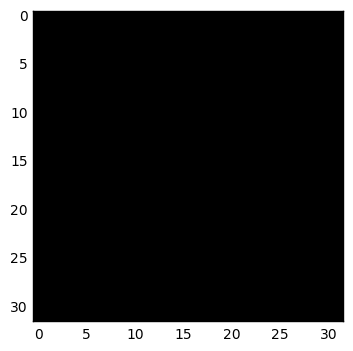

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


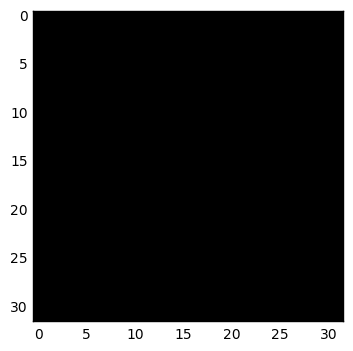

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


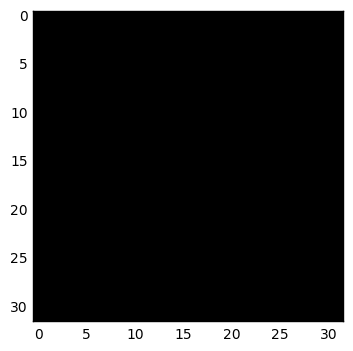

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


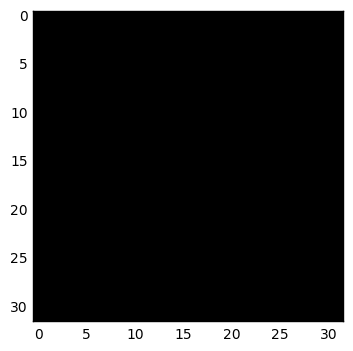

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


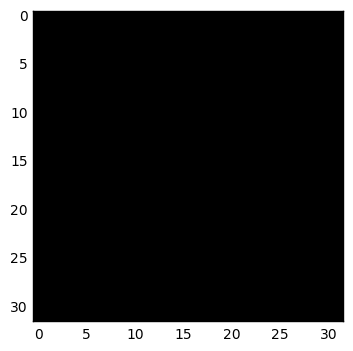

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


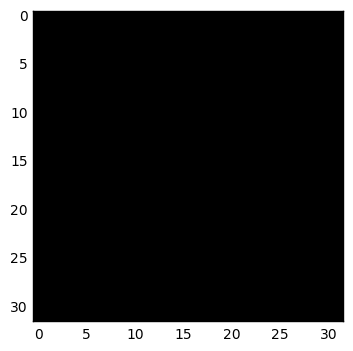

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


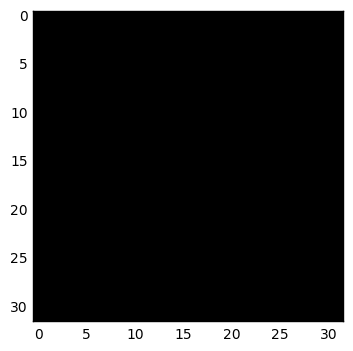

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


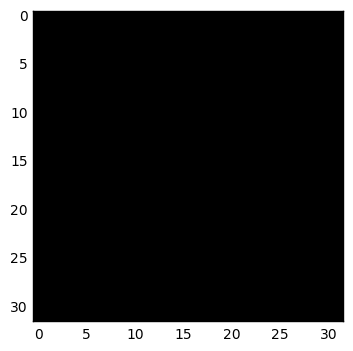

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


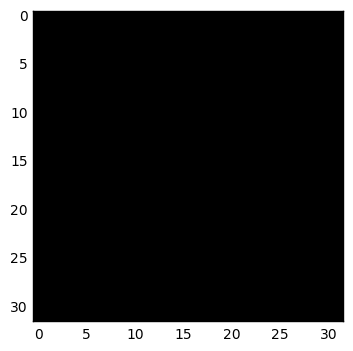

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


KeyboardInterrupt: 

In [83]:
plot_gray(X_res)

In [72]:
np.r_[a,b].reshape(3,2).ravel()

array([ 0.,  0.,  0.,  1.,  1.,  1.])